In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

#ignore the warnings which generates after executing the code
warnings.filterwarnings('ignore')

In [238]:
# Loading the loan data and convert into dataframe
loan_df = pd.read_csv('loan.csv', low_memory=False)

<h2><b>Exploratory Data Analysis (EDA) Process Overview:</b></h2>
The EDA process encompasses several crucial steps, ensuring a thorough understanding of the dataset. This involves:

<b>1. Data Cleaning:</b> This initial step focuses on refining the dataset by eliminating null values, redundant columns, and unnecessary rows.

<b>2. Univariate Analysis:</b> A comprehensive examination of the dataset based on individual columns. This provides insights into the distribution and characteristics of each variable independently.

<b>3. Bivariate Analysis:</b> Involves analyzing the dataset by considering the relationships and interactions between two or more columns. This step aids in identifying patterns and dependencies within the data.

<b>4. Segmented Univariate Analysis:</b> This specialized analysis involves focusing on specific segments or portions of the dataset based on a single column. It allows for a more targeted exploration of particular subsets of the data.

<b>5. Derivative Analysis:</b> In this step, new columns are derived based on the information present in existing columns. This can include calculations, transformations, or aggregations to extract additional insights from the dataset.

By systematically applying these EDA techniques, a comprehensive understanding of the dataset is obtained, facilitating informed decisions in the subsequent stages of the machine learning and artificial intelligence processes.



<h3><b>1. Data Cleaning</b></h3>


<h4><b>1.1 Check if there is any headers,footers rows are exists if exists delete them since they don't help in analysis</b></h4>

In [239]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h4><b>Observations:</b></h4>
There are no header present in the above dataframe

In [240]:
# Check for existence of footer in the dataframe
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4><b>Observations:</b></h4>
There are no footer present in the above dataframe

In [241]:
# Check the number of rows and columns in the dataframe 
loan_df.shape

(39717, 111)

<h4><b>Observations:</b></h4>
There are toal 39717 rows and 111 columns

In [242]:
# check the the values for loan_status and if any rows doesn't help in the analysis will remove them
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [243]:
# keep the track of original total_rows 
total_rows=len(loan_df)
total_rows

39717

<h4><b>Observations:</b></h4>
All values are proper for analysis

In [244]:
# Dropping the rows for loan_status where the values is 'Current' as the loan currently in progress and cannot contribute to conclusions
loan_df= loan_df[loan_df['loan_status']!='Current']

In [245]:
# After removing all the 'Current' values from the loan_status column check the number of rows
len(loan_df)

38577

In [246]:
# Check the percentage of rows deleted
rows_delted = ((total_rows - len(loan_df)) * 100) / total_rows
# lets round the result to 2 floating values
round(rows_delted,2)

2.87

In [247]:
# Check if there is any duplicate rows
duplicate_rows = len(loan_df[loan_df.duplicated()])
duplicate_rows

0

<h4><b>1.2 Delete the Uneccessasry Columns</b></h4>

In [248]:
loan_df.shape # to get the shape of data

(38577, 111)

In [249]:
# To Check the details of columns if the they are nulls or blanks as value.
(loan_df.isnull().sum()*100)/len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

<h4><b>Observations:</b></h4>
We can see there are many columns which is having all the value as null/blanks and not doesn participate in analysis.
#Hence removing them

In [250]:
print("Total columns with values NA: ", len(loan_df.columns[loan_df.isna().all()].tolist()))
na_columns=list(loan_df.columns[loan_df.isna().all()])
print("NA colums List:")
na_columns

Total columns with values NA:  55
NA colums List:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [251]:
# Deleting the columns which is having all rows values as na.
loan_df = loan_df.dropna(axis=1, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [252]:
# Deleting the rows which is having all columns values as na.
loan_df = loan_df.dropna(axis=0, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [253]:
#Finding number of unique values, printing high unique valued columns
loan_df.nunique().sort_values(ascending=False).head(12)


id                 38577
member_id          38577
url                38577
total_pymnt        36714
total_pymnt_inv    36387
last_pymnt_amnt    34418
total_rec_int      34025
emp_title          28027
desc               25802
revol_bal          21275
title              19297
installment        15022
dtype: int64

<h4><b>Observations:</b></h4><b>
id, url, and member_id</b> having all unique values which means any one of these can be used as primary key. Let's use id primary key it will help in creating pivot table and remove url and member id columns.

In [254]:
loan_df.drop(['member_id', 'url'], axis=1, inplace=True) # inplace will not create new dataset

In [255]:
loan_df.shape

(38577, 54)

In [256]:
# Lets delete the column which is having text/description values as they don't contribute to EDA.

In [257]:
loan_df.drop(columns=['desc','title','emp_title'],inplace=True)

In [258]:
loan_df.shape

(38577, 51)

In [259]:
# We will limit our analysis till Group level only. Hence deleting the subgroups.
loan_df = loan_df.drop(['sub_grade'],  axis=1)

In [260]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_df=loan_df.drop(behavioural_cols,axis=1)

In [261]:
loan_df.nunique().sort_values()


pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [262]:
# Most of the columns values is 1.Deletting those columns as well.
# It selects all rows (:) and only the columns where the condition is True.
loan_df = loan_df.loc[:, loan_df.nunique(dropna=True) > 1]
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,RENT,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [263]:
# Dropping the columns which is having more than 50% of values are null.
loan_df = loan_df.dropna(thresh=len(loan_df) * 0.5, axis=1)
loan_df.shape

(38577, 19)

<h3><b>2. Data Conversion</b></h3>


In [264]:
# Check the type of each columns in the dataframe
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [265]:
# Check the values of the 'term' column
loan_df['term'].value_counts() 

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [266]:
# term should convert to int for numeric analysis remove 'months' from the value and convert to int
loan_df['term'] = loan_df['term'].map(lambda x: int(x.strip().split()[0]))

In [267]:
# check the type of term
print(loan_df['term'].dtype)


int64


In [268]:
loan_df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [269]:
loan_df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [270]:
# convert int_rate from string to float.
loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)

In [271]:
loan_df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [272]:
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [273]:
# Convert the column loan_funded_amnt and funded_amnt as flot64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [274]:
loan_df.dtypes

id                        int64
loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [275]:
columns_to_round = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']
loan_df[columns_to_round] = loan_df[columns_to_round].round(2)

In [276]:
#converting issue_d to date type
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [277]:
# Find the total number of missing values
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

<h4><b>Observations:</b></h4>
emp_length and pub_rec_bankruptcies contain null values

In [278]:
# Delete the columns emp_length and pub_rec_bankruptcies
loan_df= loan_df[loan_df['emp_length'].notna()]
loan_df= loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [279]:
# Again check for null values
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [280]:
# check the value of emp_length
loan_df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 36847, dtype: object

In [281]:
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_df['emp_length']=loan_df['emp_length'].apply(lambda x : strip_emp_length(x) )

In [282]:
loan_df['emp_length']

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object

In [283]:
# print the column size
len(loan_df.columns)

19

<h3><b>4. Derived Columns</b></h3>


In [284]:
#create a new column issue_d_year,issue_d_month,issue_d_weekday which is a derived column from the issue_d
loan_df['issue_d_year'] = loan_df.issue_d.dt.year
loan_df['issue_d_month'] = loan_df.issue_d.dt.strftime('%b')
loan_df['issue_d_weekday'] = loan_df.issue_d.dt.weekday

Creating 'Approved Loan amount ratio' which is a ratio of Funded Amount by investor to Requested Loan amount.

In [285]:
# it is a derived column which is computed using funded amoutn and actual loan amount
loan_df['approved_loan_amnt_ratio'] = round(loan_df.funded_amnt_inv * 100 / loan_df.loan_amnt, 2)

In [286]:
# column size should be increased by 3 now since we added above derived columns
loan_df.shape

(36847, 23)

<h3><b>5. Univariate Analysis</b></h3>


In [287]:
print(loan_df["loan_amnt"].describe())

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<h4><b>Observations:</b></h4>

<ul>
    <li><strong>Count:</strong> 36,847 non-null entries for loan amounts.</li>
    <li><strong>Mean:</strong> The average loan amount is approximately 11,141.33.</li>
    <li><strong>Standard Deviation:</strong> Loan amounts vary with a standard deviation of around 7,369.99.</li>
    <li><strong>Minimum:</strong> The smallest loan amount in the dataset is 500.</li>
    <li><strong>25th Percentile (Q1):</strong> 25% of the loans have amounts up to 5,500.</li>
    <li><strong>Median (50th Percentile):</strong> The middle value of loan amounts is 10,000.</li>
    <li><strong>75th Percentile (Q3):</strong> 75% of the loans have amounts up to 15,000.</li>
    <li><strong>Maximum:</strong> The largest loan amount in the dataset is 35,000.</li>
</ul>

In [288]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

 <h4># Bucketing different varaibles for better analysis</h4>

In [289]:
# Bucketing annual_inc
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [290]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_b'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [291]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_b'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [292]:
# Method to plot the graph for given column
def plot_digram(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sb.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sb.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    plt.tight_layout()
    plt.show()

Analysis on the column <b> Loan Amount </b> and 2 plots for the same distplot and boxplot

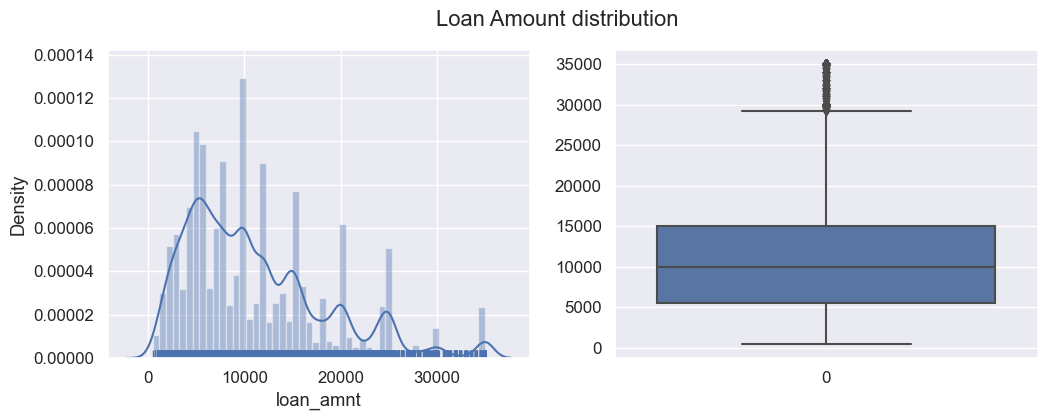

In [293]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sb.distplot(a=loan_df.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sb.boxplot(data=loan_df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [294]:
loan_df.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
90%      20325.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

<b>Observations:</b><br/>
Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.

In [295]:
# describe the Loan Amount
loan_df['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<b>Observations:</b><br/>
 Most of the loan amount applied was in the range of 5k-15k. </br>Max Loan amount applied was ~35k.

<b>funded_amnt_inv</b><br/>
The total amount committed by investors for that loan at that point in time.

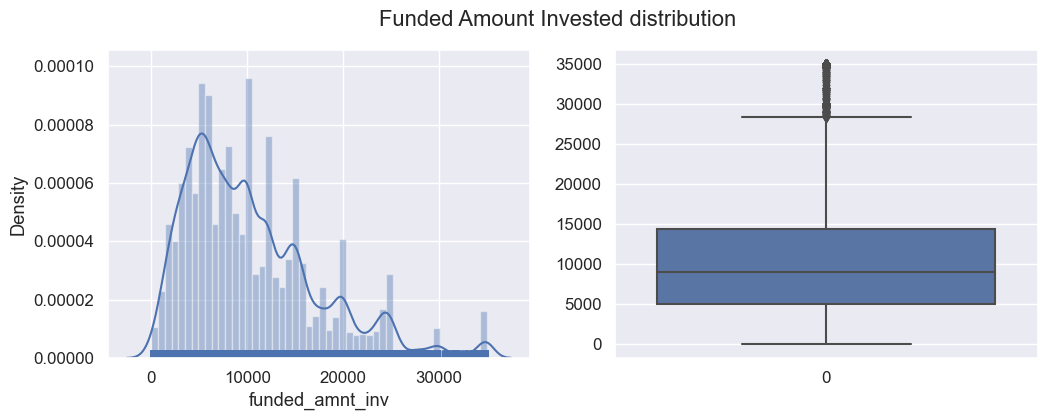

In [296]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.distplot(a=loan_df.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sb.boxplot(data=loan_df.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

<b>Observations:</b></br>
Funded amount investment data behaves similar to loan Amount, Which tells us that Lending club approved atmost of Applied loan amount.

<b>Approved Loan Amount Ratio</b>

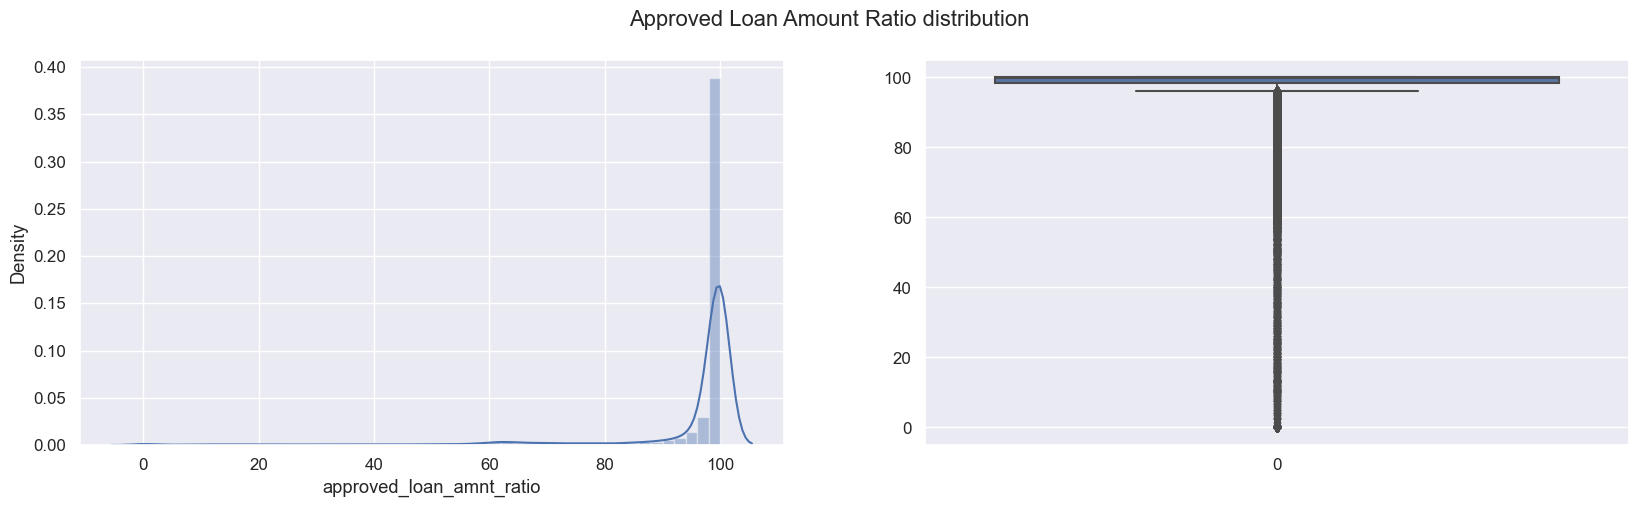

In [297]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sb.distplot(a=loan_df.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sb.boxplot(data=loan_df.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

<b>Observations:</b></br> 70% of Borrowers got 100% loan amount from investors.



<b>Interest Rate</b>

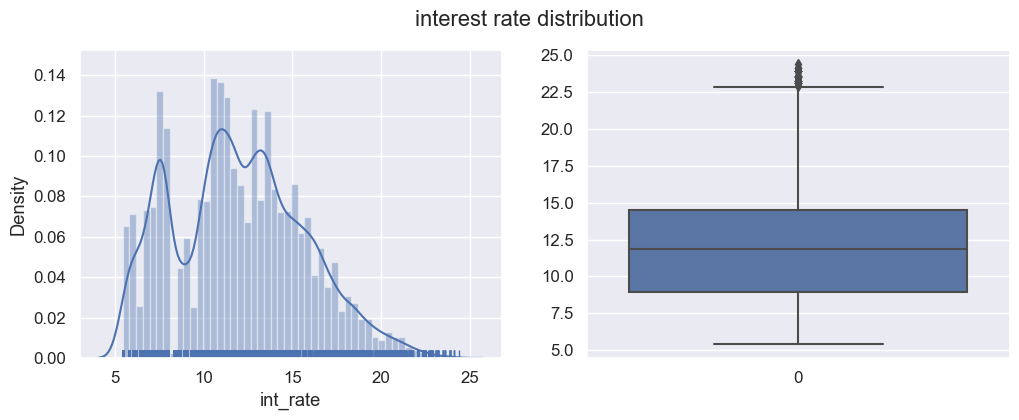

In [298]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.distplot(a=loan_df.int_rate, rug=True)
plt.subplot(1,2,2)
sb.boxplot(data=loan_df.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

<b>Observations:</b><br/>
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between 9% to 14.5%. Some people took loan at higher rates of interest i.e., 22.5%

In [299]:
loan_df['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

<b>Observations:</b><br/>
Most of the applicant's rate of intrest is between in the range of 8%-14%.</br>
Average Rate of interest of rate is 11.7%

<b>Installment</b><br/>
The monthly payment owed by the borrower if the loan originates.




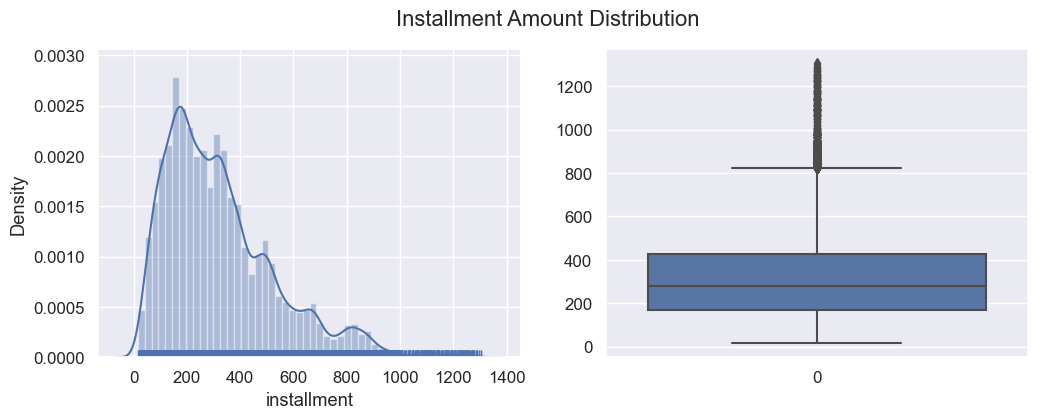

In [300]:
installment = loan_df.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sb.boxplot(data=installment)
plt.suptitle('Installment Amount Distribution')
plt.show()

<b>Observations:</b></br>
The Most representative value of Installment amount in around 280.

<b>DTI</b></br>
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

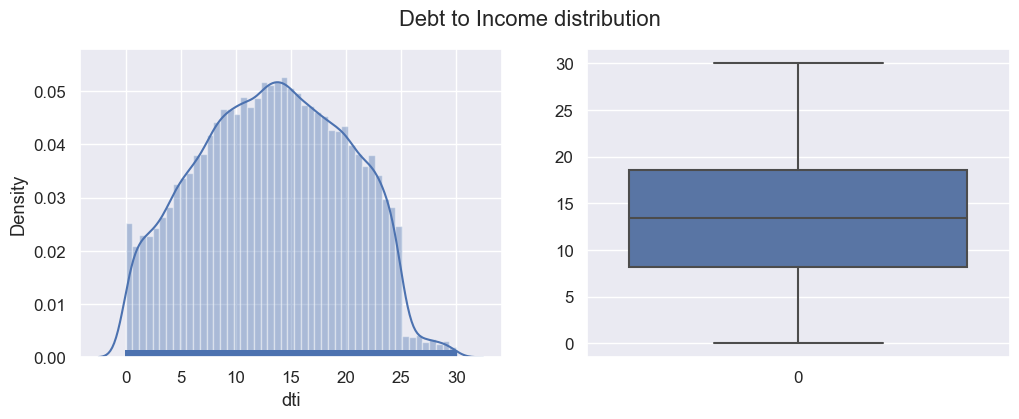

In [301]:
var1 = loan_df.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sb.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

<b>Observations:</b><br/>
Looks like there are no outliers and the distribution is very much similar to normal distribution. This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

<b>Pub rec</b></br>
Number of Public derogatory records

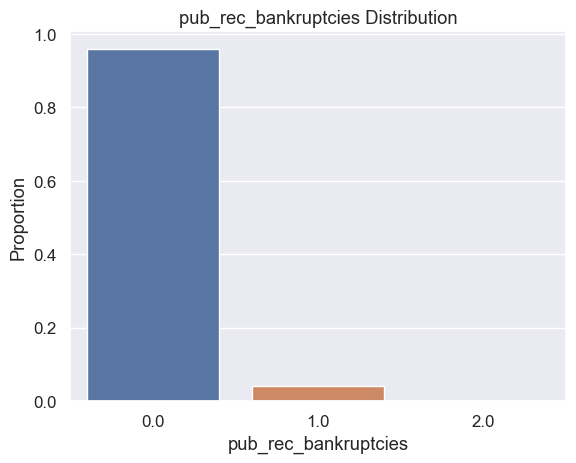

In [302]:
var = 'pub_rec_bankruptcies'
# Probability / Percentage of each value
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

# Renaming the columns to avoid the 'index' issue
prob_df.columns = [var, 'Proportion']

# Creating the bar plot
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var + ' Distribution')

# Display the plot
plt.show()


<b>Observations</b><br/>
Around 90% borrower's are having no public derogatory records.

<b>pub_rec_bankruptcies</b></br>
Number of public record bankruptcies

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

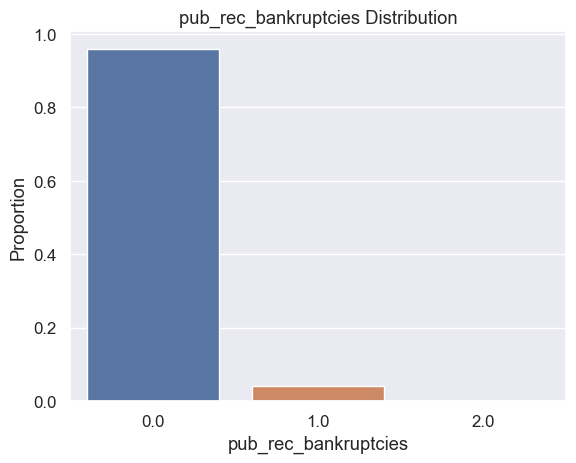

In [303]:
var = 'pub_rec_bankruptcies'
# Probability / Percentage of each value
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

# Renaming the columns to avoid the 'index' issue
prob_df.columns = [var, 'Proportion']

# Creating the bar plot
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var + ' Distribution')

# Display th

<b>Observations:</b></br>
99% people have not went bankrupt.

<b>Loan issue year, Loan issue month, Loan issue day (issue_d), </b><br/>


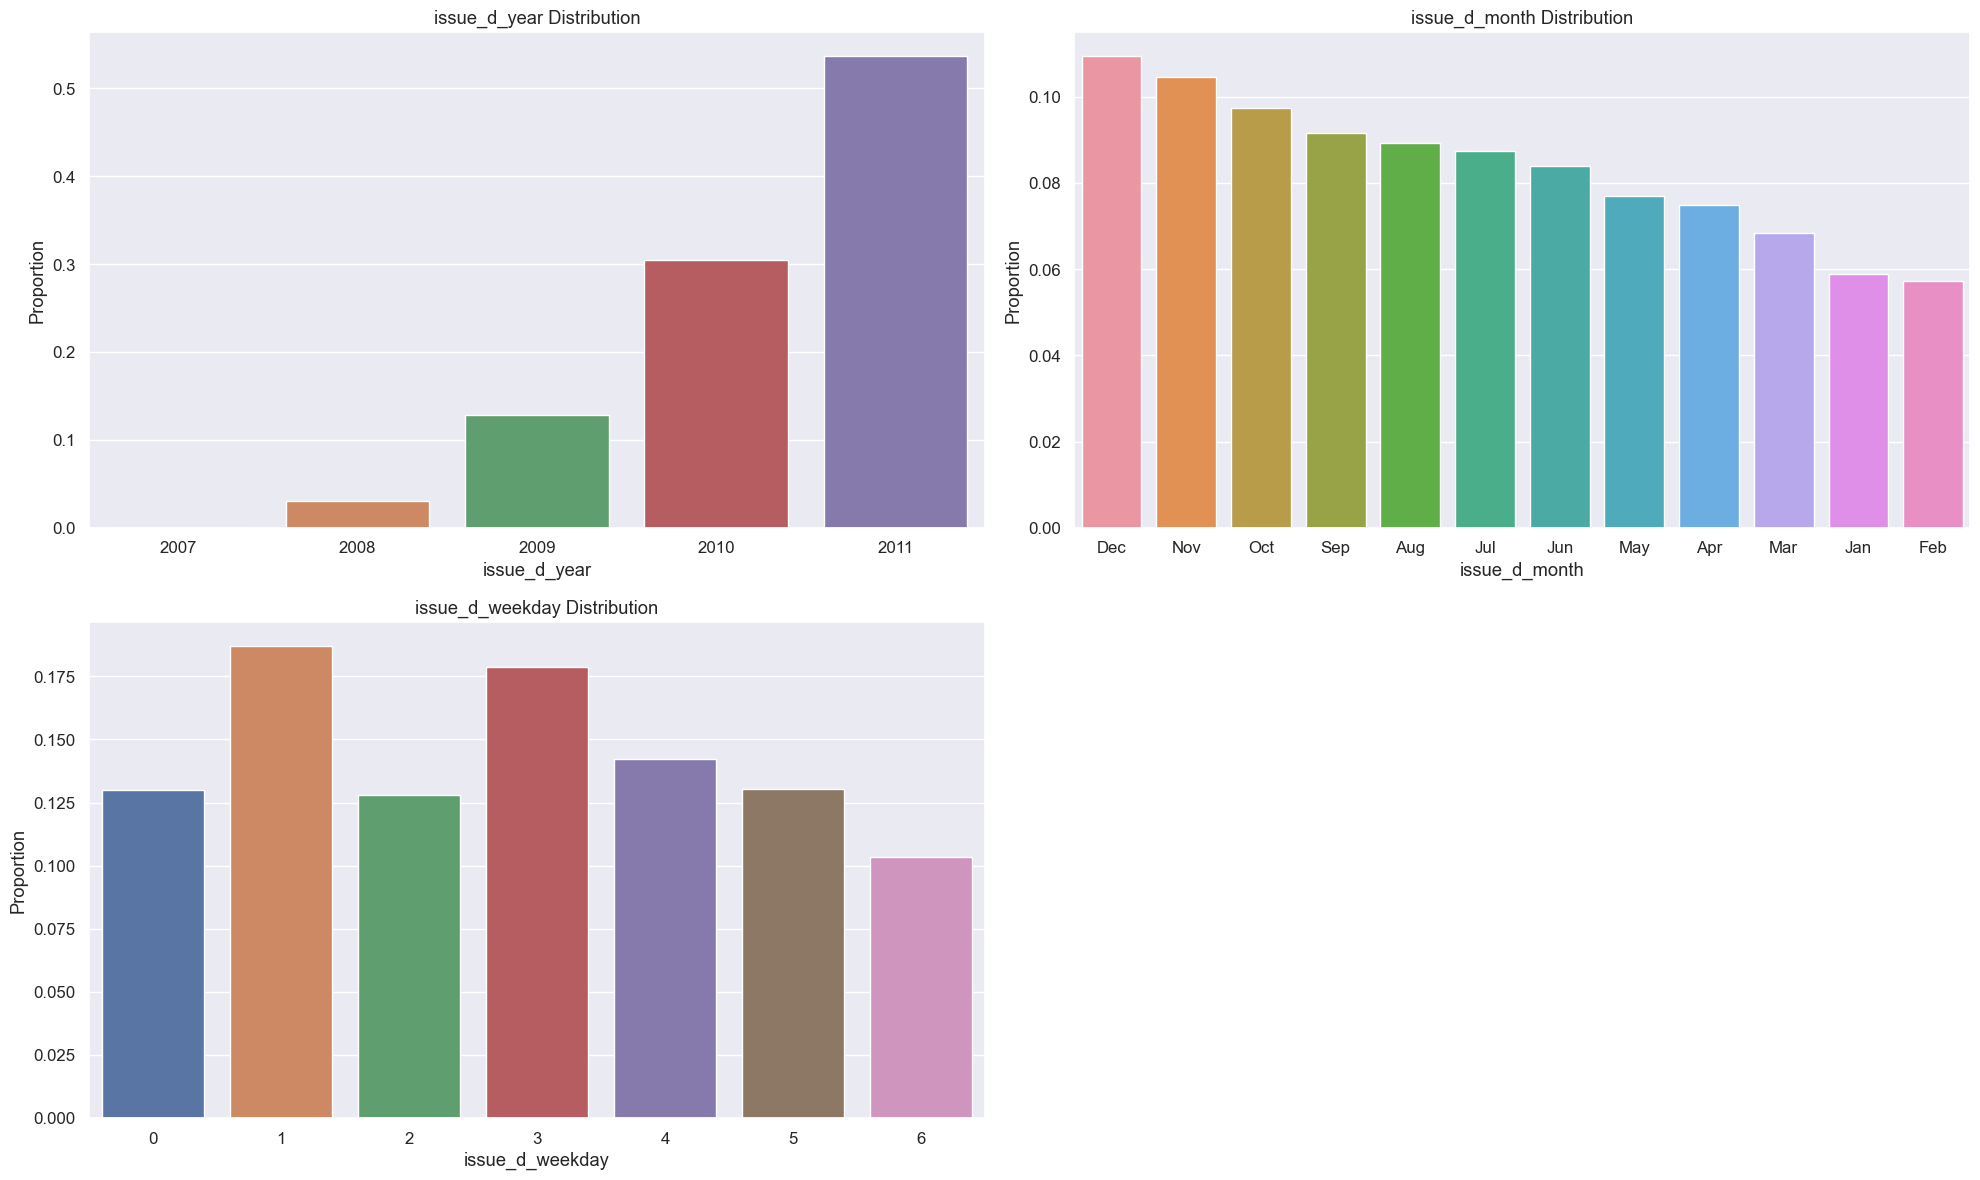

In [304]:
# Set up the figure with a 2x2 grid
plt.figure(figsize=(20, 12))

# First subplot: issue_d_year
plt.subplot(2, 2, 1)
var = 'issue_d_year'
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var + ' Distribution')

# Second subplot: issue_d_month
plt.subplot(2, 2, 2)
var = 'issue_d_month'
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var + ' Distribution')

# Third subplot: issue_d_weekday
plt.subplot(2, 2, 3)
var = 'issue_d_weekday'
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var + ' Distribution')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<b>Observations:</b></br>
The lending club(LC) has doubling loan issues every year.<br/>
There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec.<br/>
LC has issued more loans on tuesday and wednessday than other week days.<br/>

<b><h3>Home Ownership</h3> (Unordered Categorical Variable Analysis)</b>

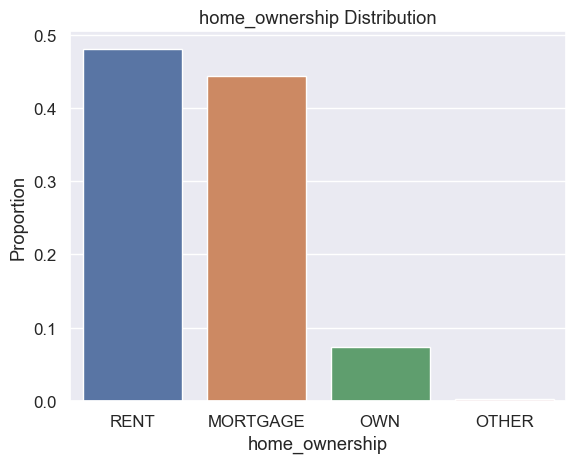

In [305]:
var = 'home_ownership'
# Use seaborn countplot
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var + ' Distribution')
plt.show()

<b>Observations:</b><br/>
The loan borrowers are mostly having rented and mortgage houses.

<b>Verification Status</b>

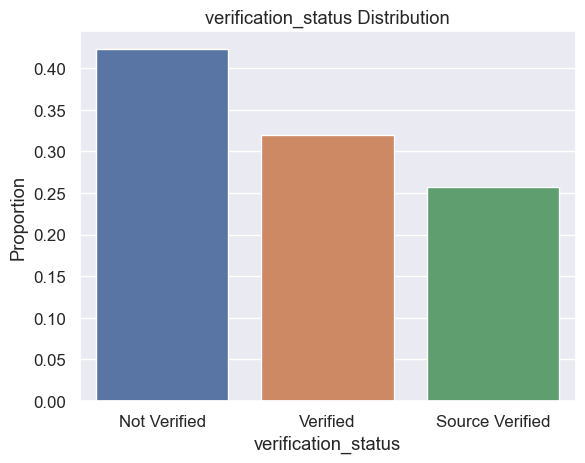

In [306]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()


<b>Observations</b>:<br/>
Majority of loans were given without verification of applicants income.



<b>Loan Status<b/>

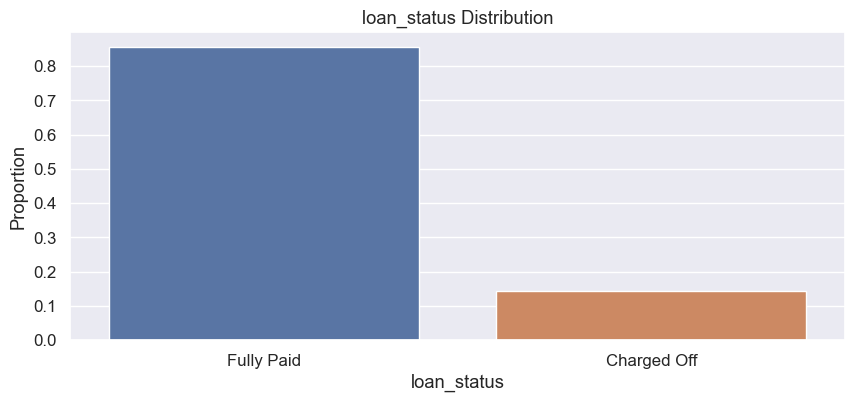

In [307]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

<b>Observations:</b></br>
85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

<b><h3>Employment length</h3> (Ordered Categorical Variable Analysis)</b>

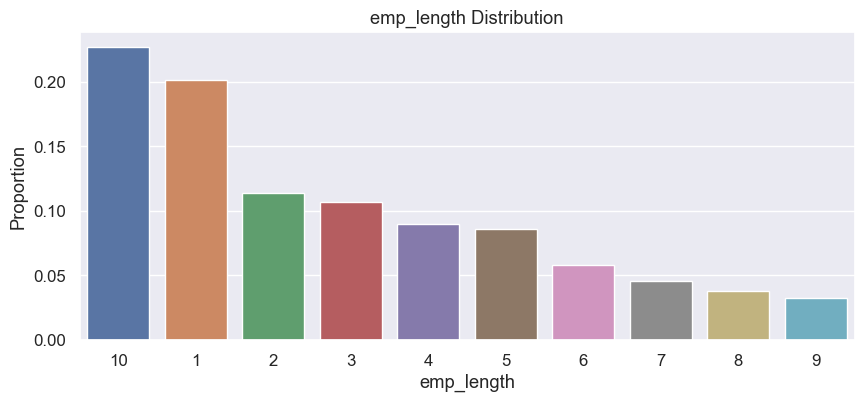

In [308]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

<b>Observations:</b><br/>
Borrowers are mostly 10+ years emploment length.

<b>Grade</b>

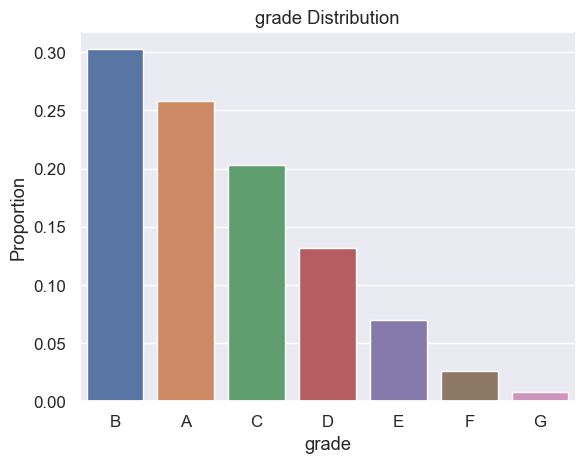

In [309]:
var = 'grade'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

<b>Observations:</b></br>
Most borrowers fall under A and B grades then other grades

<b><h3>Purpose</h3> (Unordered Categorical Variable Analysis)</b>

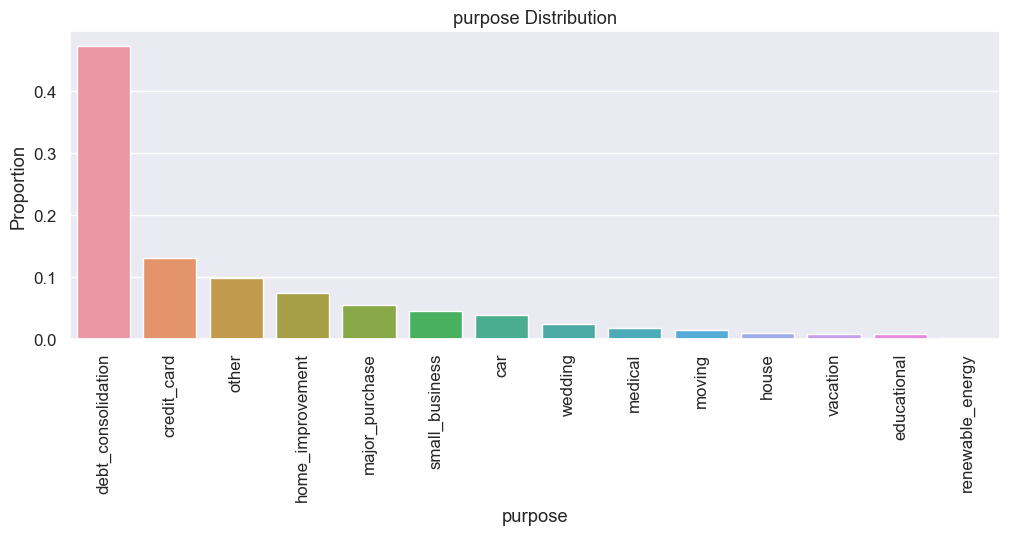

In [310]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

<b><h3>Borrower's State</h3> (Unordered Categorical Variable Analysis)</b>

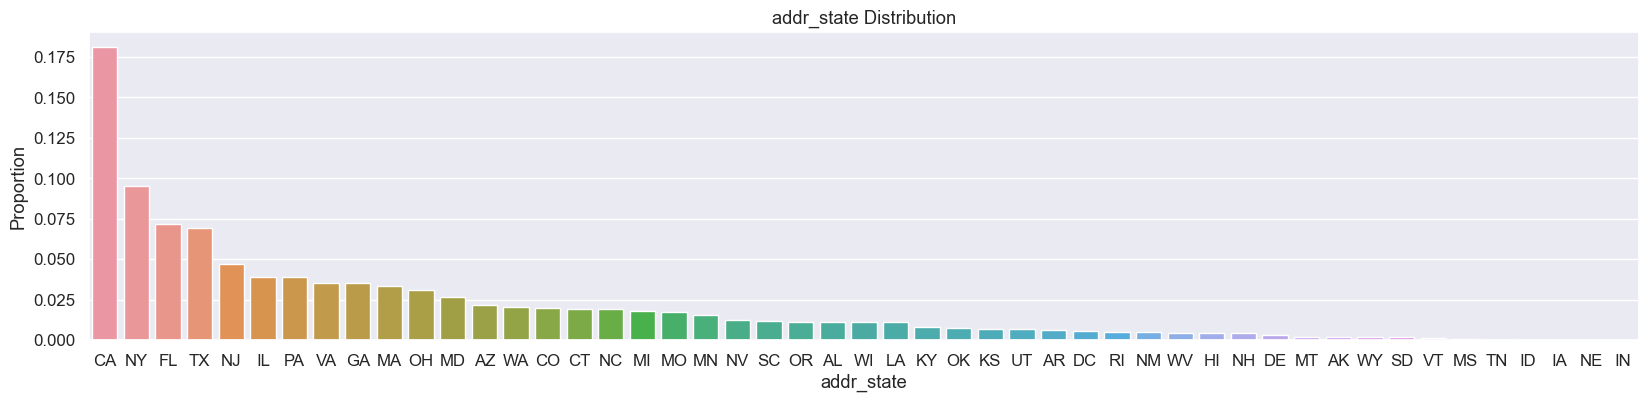

In [311]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = loan_df[var].value_counts(normalize=True).reset_index()
prob_df.columns = [var, 'Proportion']
sb.barplot(x=var, y='Proportion', data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

<b>Observations:</b></br>
Most of the borrowers are from CA and NY

<h3> Detect Outliers</h3>

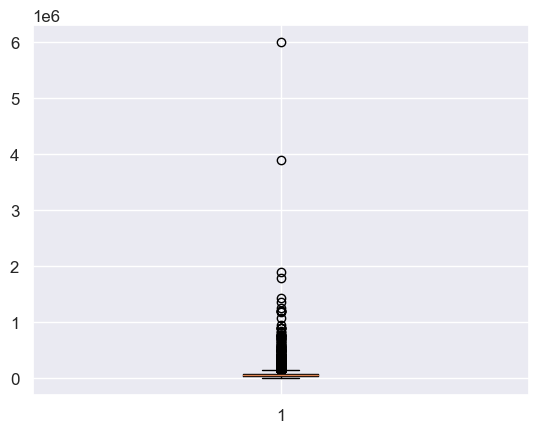

In [312]:
plt.boxplot(loan_df['annual_inc'])
plt.show()

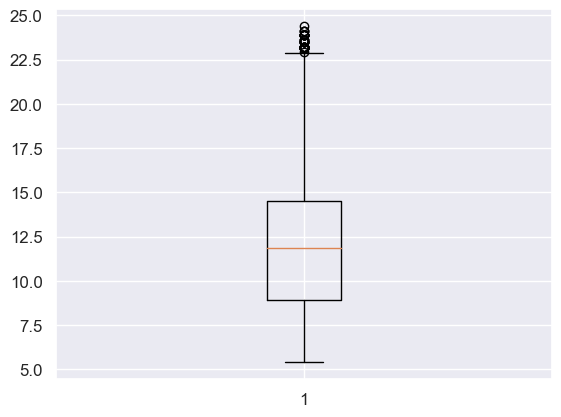

In [313]:
plt.boxplot(loan_df['int_rate'])
plt.show()

<b>Observations: </b>
There is a outlier after 22.5

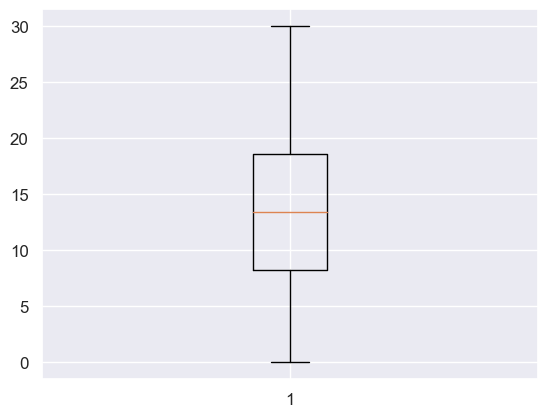

In [314]:
plt.boxplot(loan_df['dti'])
plt.show()

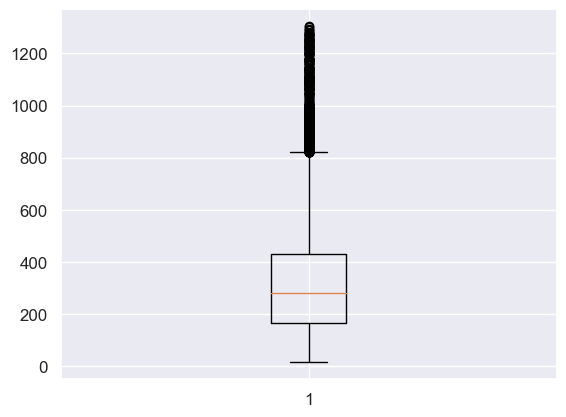

In [315]:
plt.boxplot(loan_df['installment'])
plt.show()

<h3><b> Remove Outliers </b><h3>

In [316]:
# From above box plts we can see there is outliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns, threshold=1.5):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set1)
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set2)

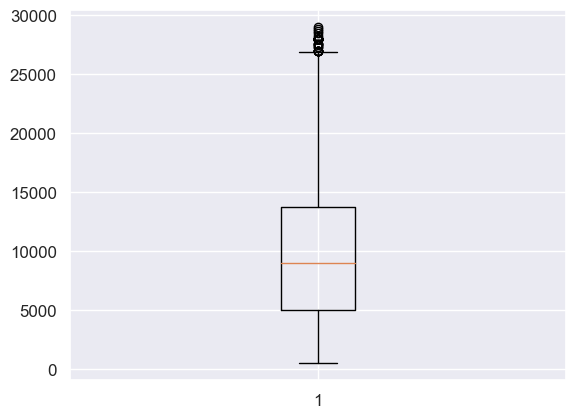

In [317]:
plt.boxplot(loan_df['loan_amnt'])
plt.show()

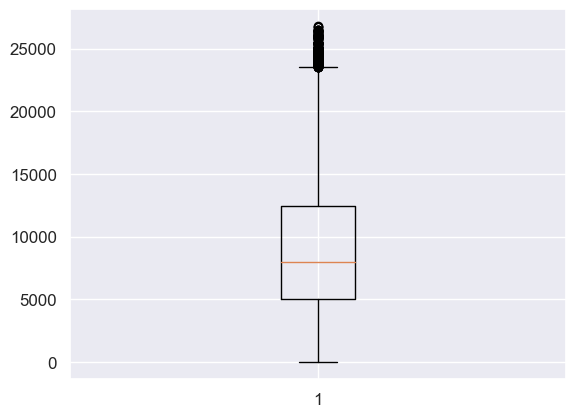

In [318]:
plt.boxplot(loan_df['funded_amnt_inv'])
plt.show()

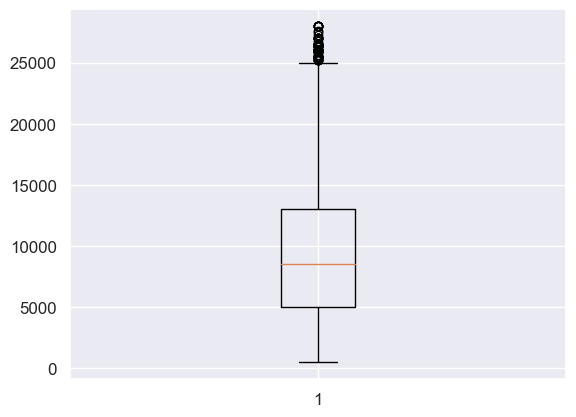

In [319]:
plt.boxplot(loan_df['funded_amnt'])
plt.show()


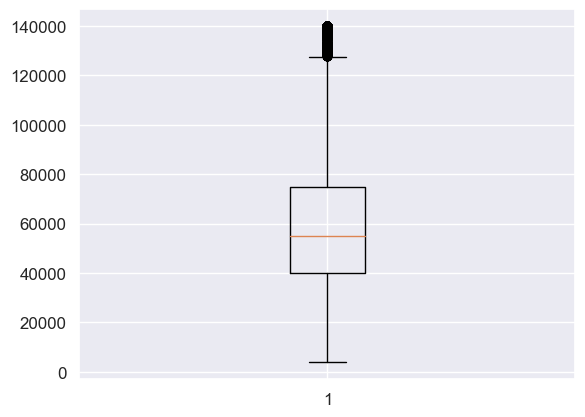

In [320]:
plt.boxplot(loan_df['annual_inc'])
plt.show()

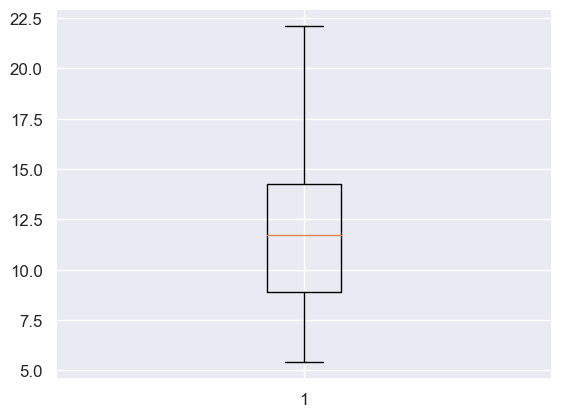

In [321]:
plt.boxplot(loan_df['int_rate'])
plt.show()

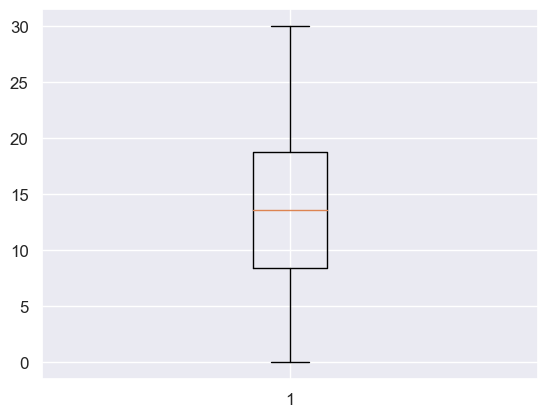

In [322]:
plt.boxplot(loan_df['dti'])
plt.show()

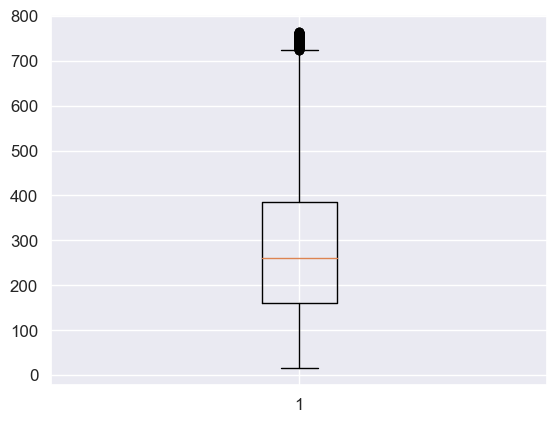

In [323]:
plt.boxplot(loan_df['installment'])
plt.show()

<h3><b>6. Bivariate Analysis</b></h3>


In [324]:
#grouping it by the columns 'annual_inc_b' and 'loan_status', counting the occurrences of each combination, unstacking the result to reshape it, filling NaN values with 0, and finally resetting the index of the DataFrame
inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#The values in the 'Total' column are computed by summing the corresponding values from the 'Charged Off' and 'Fully Paid' columns for each row
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


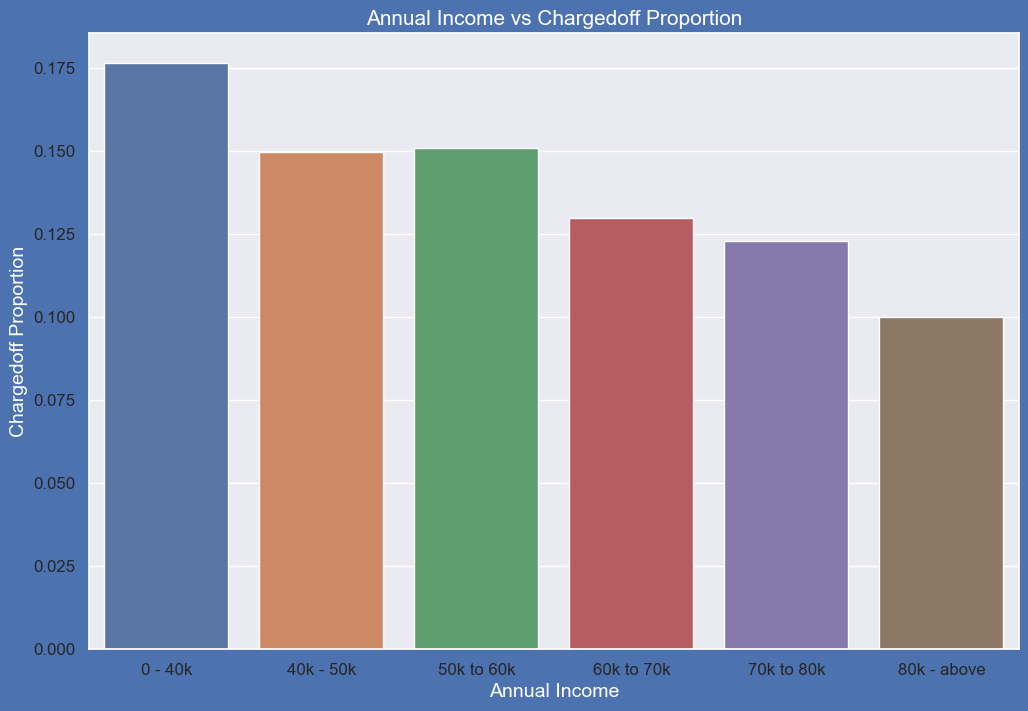

In [325]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sb.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

<b>Observations:</b></br>
Income range 80000+  has less chances of charged off.<br/>
Income range 0-20000 has high chances of charged off.<br/>

In [326]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan_df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


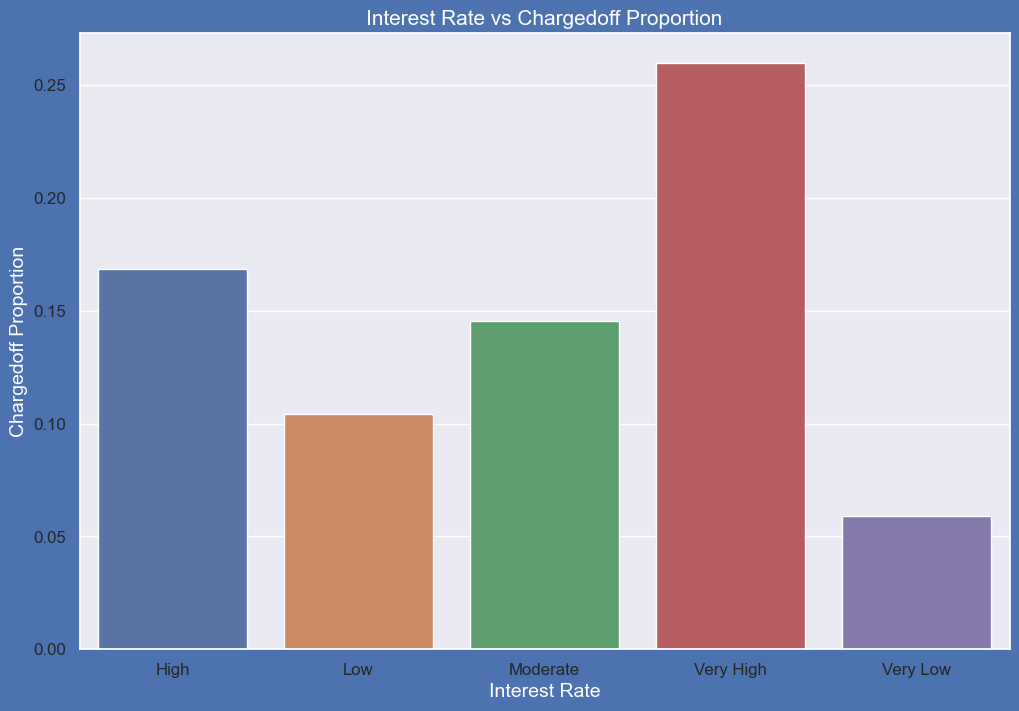

In [327]:
## plot the diagram.
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sb.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

 <h3><b>Observations:</b></h3>
interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimin 5 %. </br>
interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates. </br>
Charged off proportion is increasing with higher intrest rates.

In [328]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


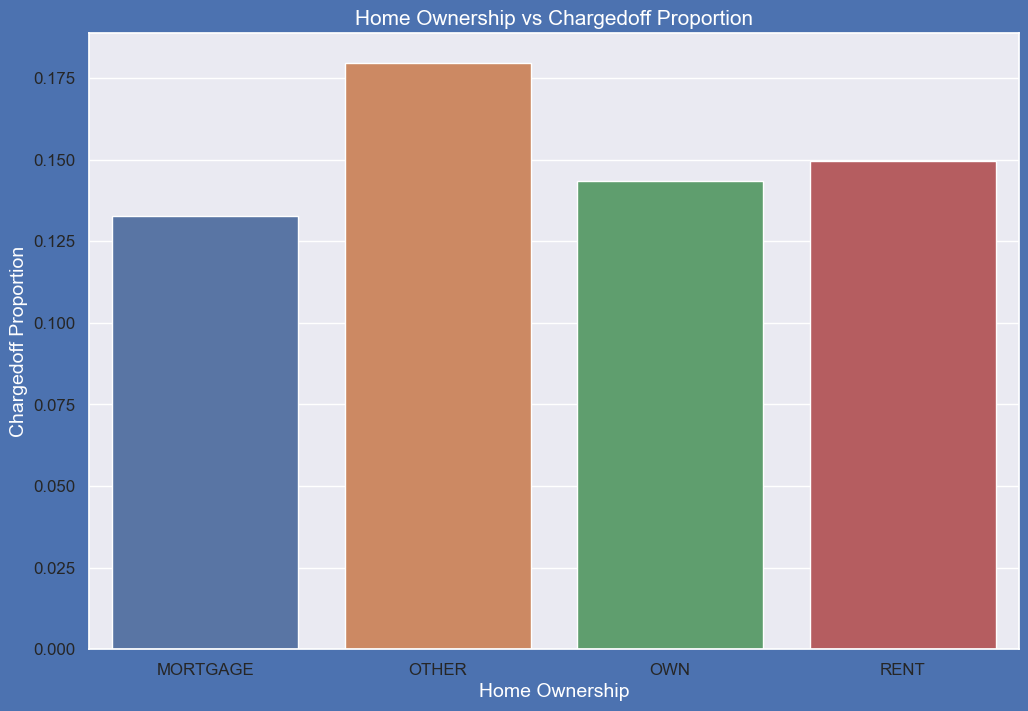

In [329]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sb.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

<h3></>observations:</b></h3>
 Those who are not owning the home is having high chances of loan defaults.

In [330]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion
purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


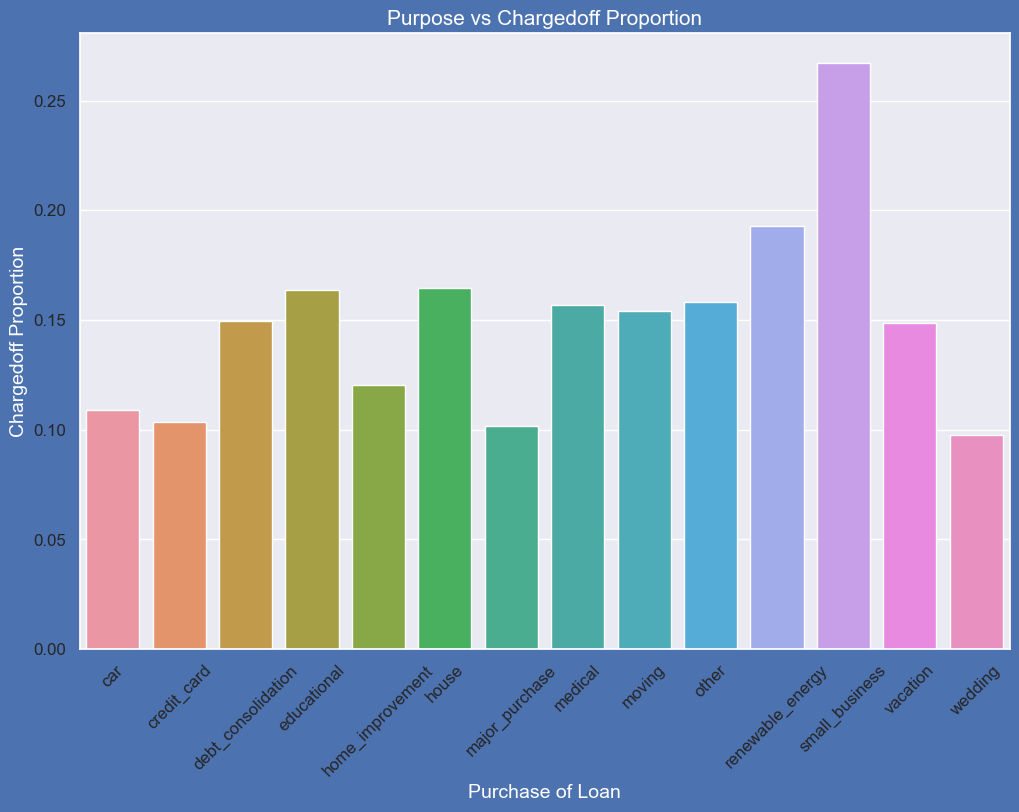

In [331]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sb.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

<h3></>observations:</b></h3>
 Those applicants who is having home loan is having low chances of loan defaults.</br>
 Those applicants having loan for small bussiness is having high chances for loan defaults.



In [332]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan_df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


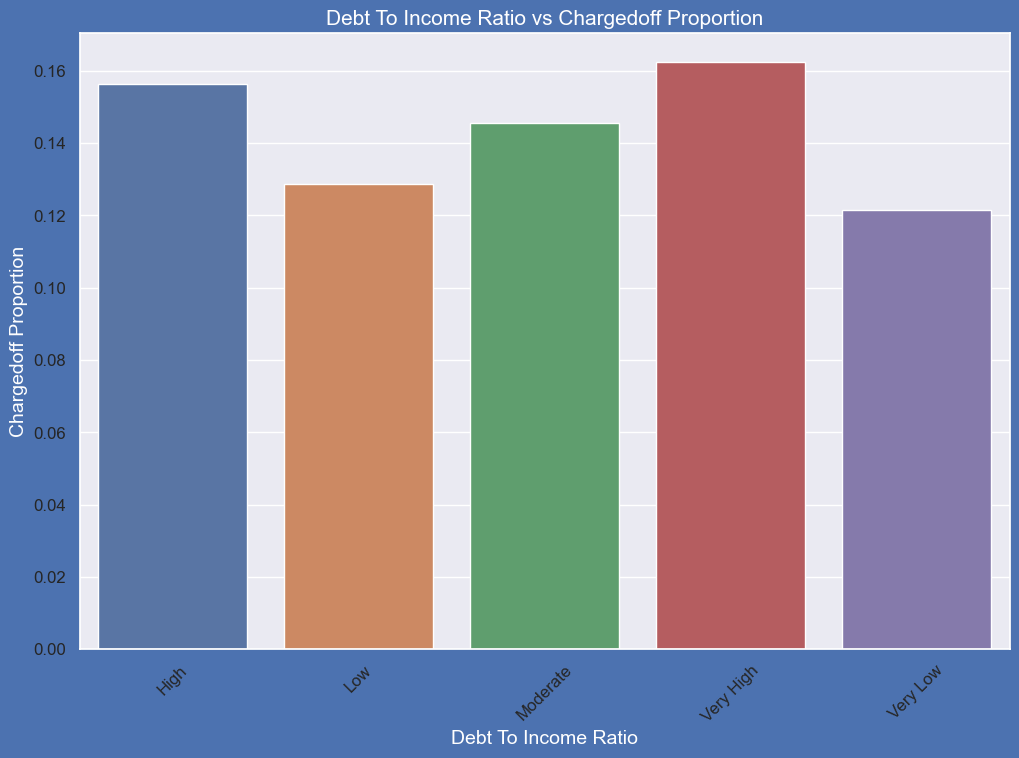

In [333]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sb.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

<h3><b>Observations:</b></h3>
High DTI value  having high risk of defaults </br>
Lower the DTO having low chances loan defaults.

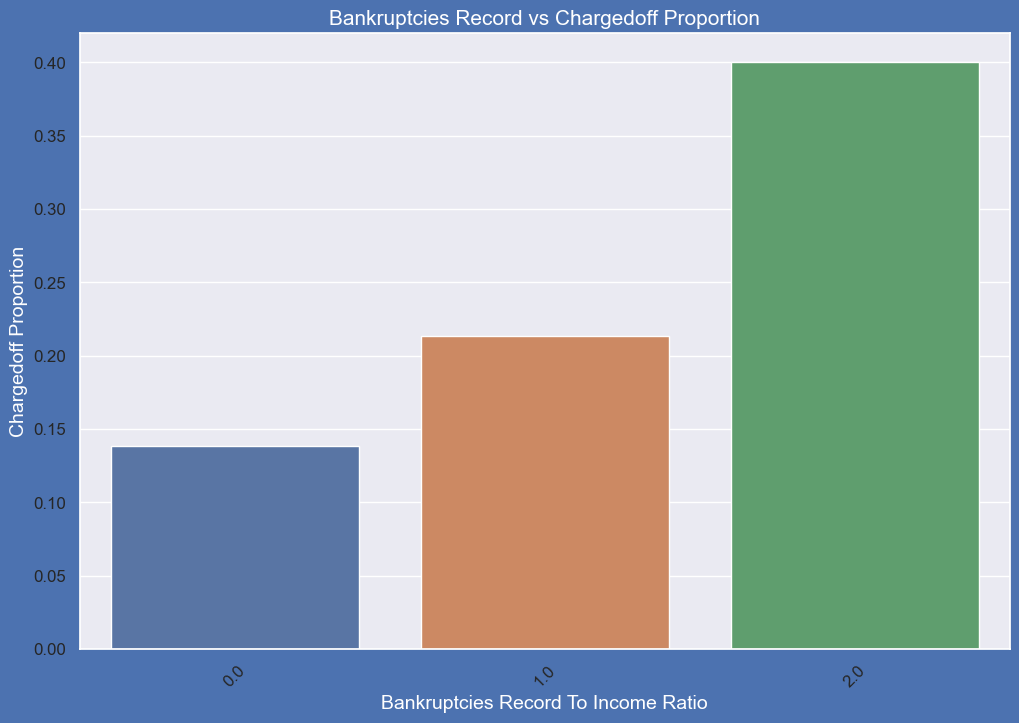

In [334]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sb.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

 <h3><b>Observations:</b></h3>
 Bankruptcies Record with 2 is having high impact on loan defaults</br>
 Bankruptcies Record with 0 is low impact on loan defaults </br>
 Lower the Bankruptcies lower the risk.

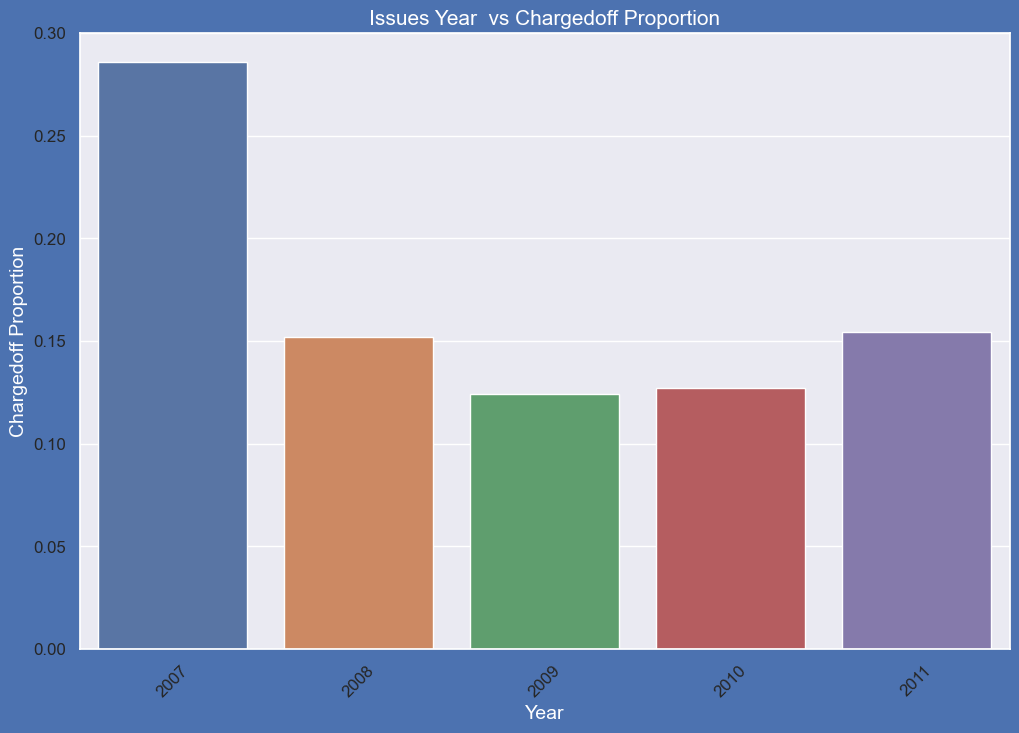

In [335]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = loan_df.groupby(['issue_d_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sb.barplot(x='issue_d_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

<h3><b>Observations:</b></h3>
Year 2007 is highest loan defaults.</br>
2009 is having lowest loan defaults.

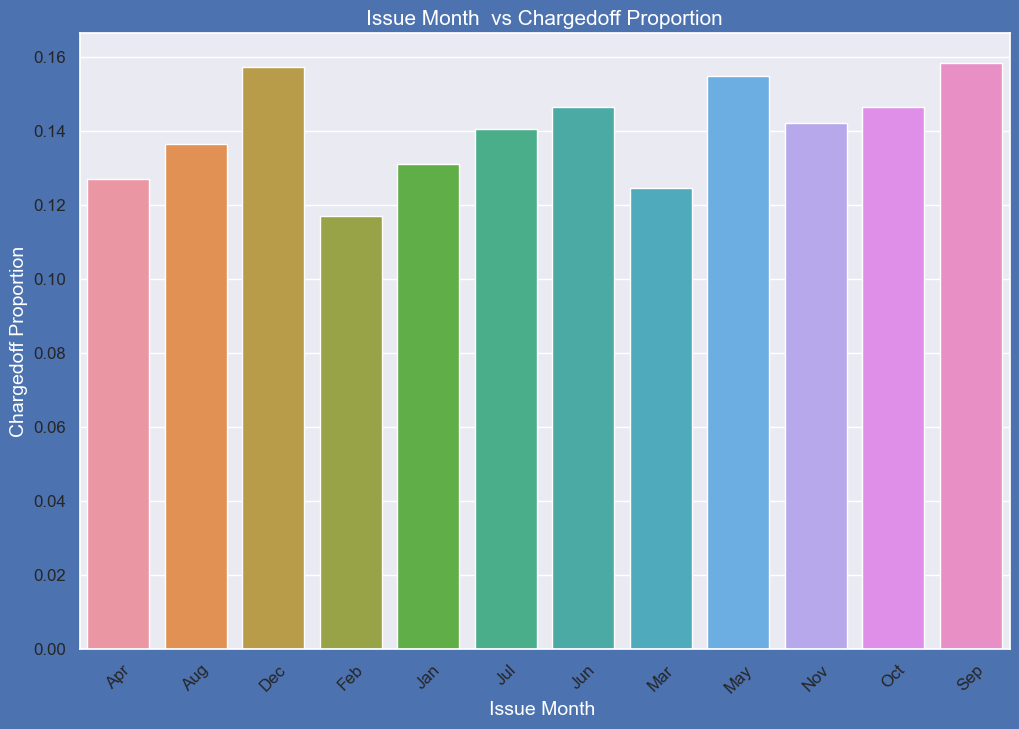

In [336]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan_df.groupby(['issue_d_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sb.barplot(x='issue_d_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

<h3><b>Observations:</h3></b>
 Those loan has been issued in May, September and december is having high number of loan defaults.</br> Those loan has been issued in month of February is having high number of loan defaults.</br> Majority of loan defaults comig from applicants whose loan has been aprroved from September-to Deceber

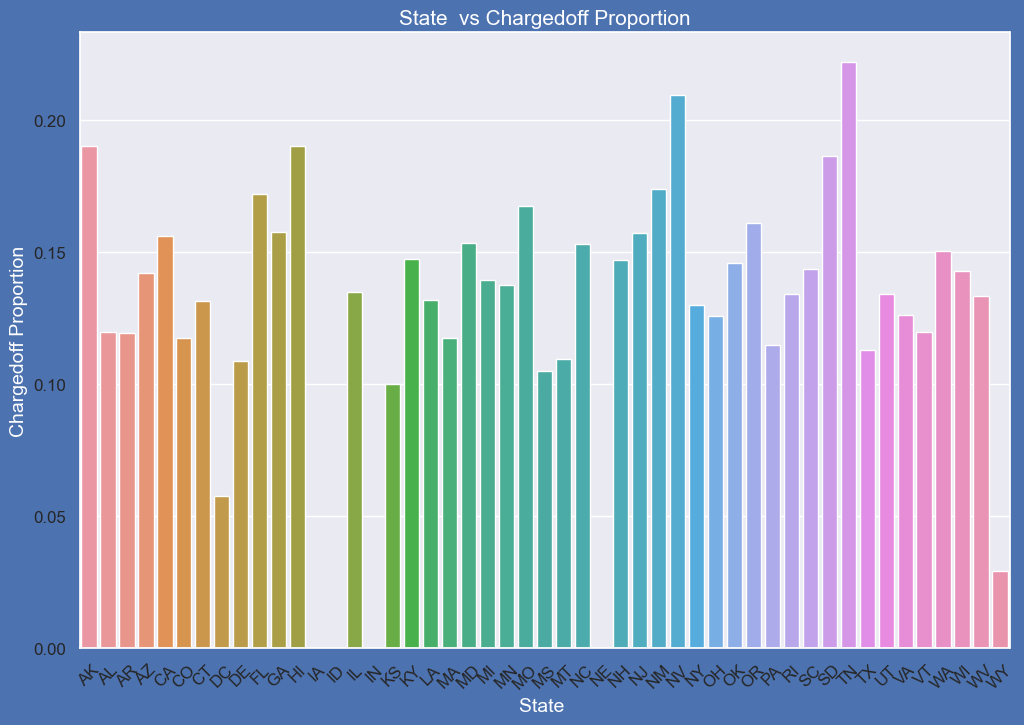

In [337]:
# #Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sb.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

<h3><b>Observations:</b></h3></br>
 DE States is holding highest number of loan defaults.</br>
 CA is having low number of loan defaults

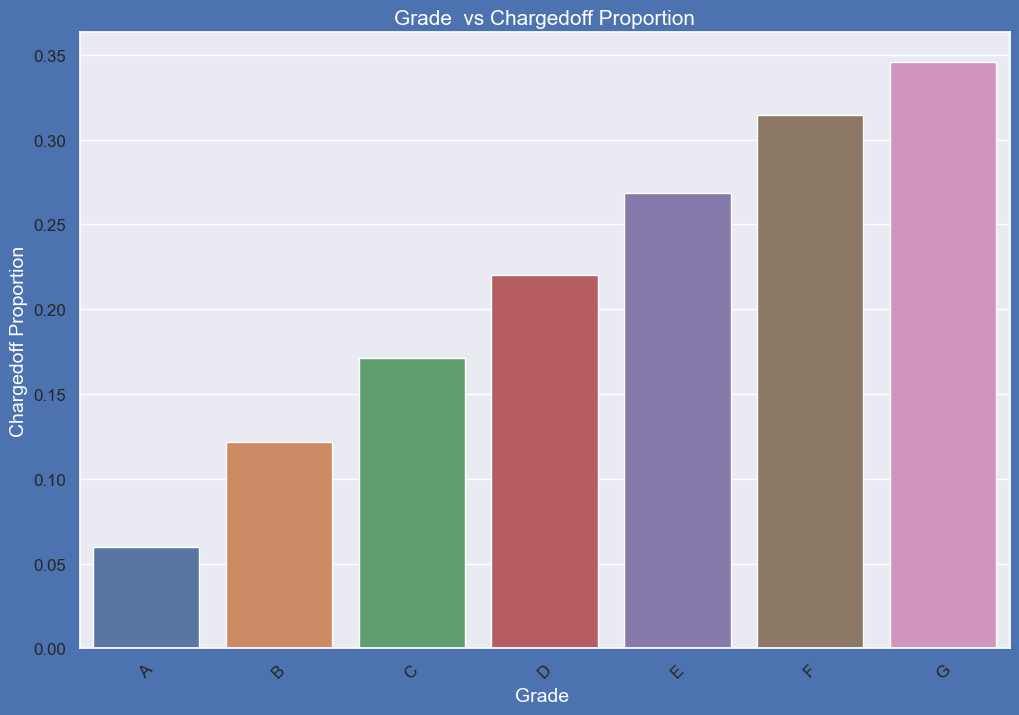

In [338]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sb.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

  <h3><b>observations:</b></h3></br>
    The Loan applicants with loan Grade G is having higest Loan Defaults.</br>
    The Loan applicants with loan A is having lowest Loan Defaults.

<h3><b>7. Segmented Univariate Analysis</b></h3>


Text(0.5, 1.0, 'Terms vs Loan Amount')

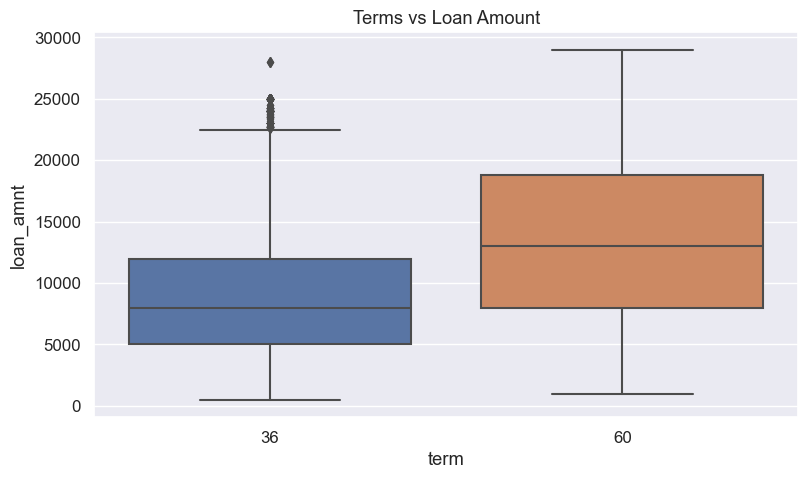

In [339]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(x='term', y=loan_df.loan_amnt, data=loan_df)
plt.title('Terms vs Loan Amount')

<b>Observations:</b><br/>
Higher amount loans have high tenure i.e, 60 months.<br/>

<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

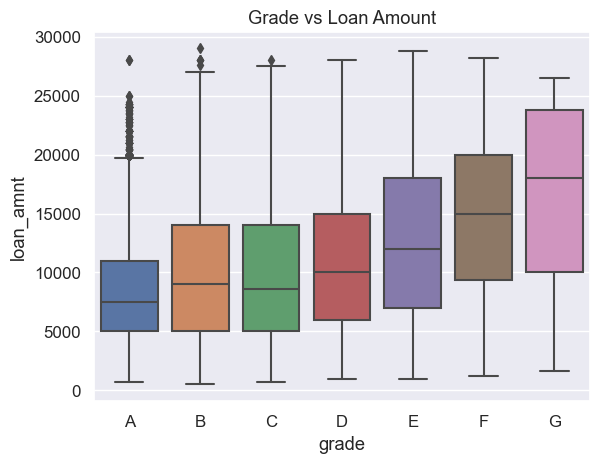

In [340]:
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sb.boxplot(x='grade', y=loan_df.loan_amnt, order = grade_ord, data=loan_df)

<b>Observations:</b><br/>
Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

<Axes: title={'center': 'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

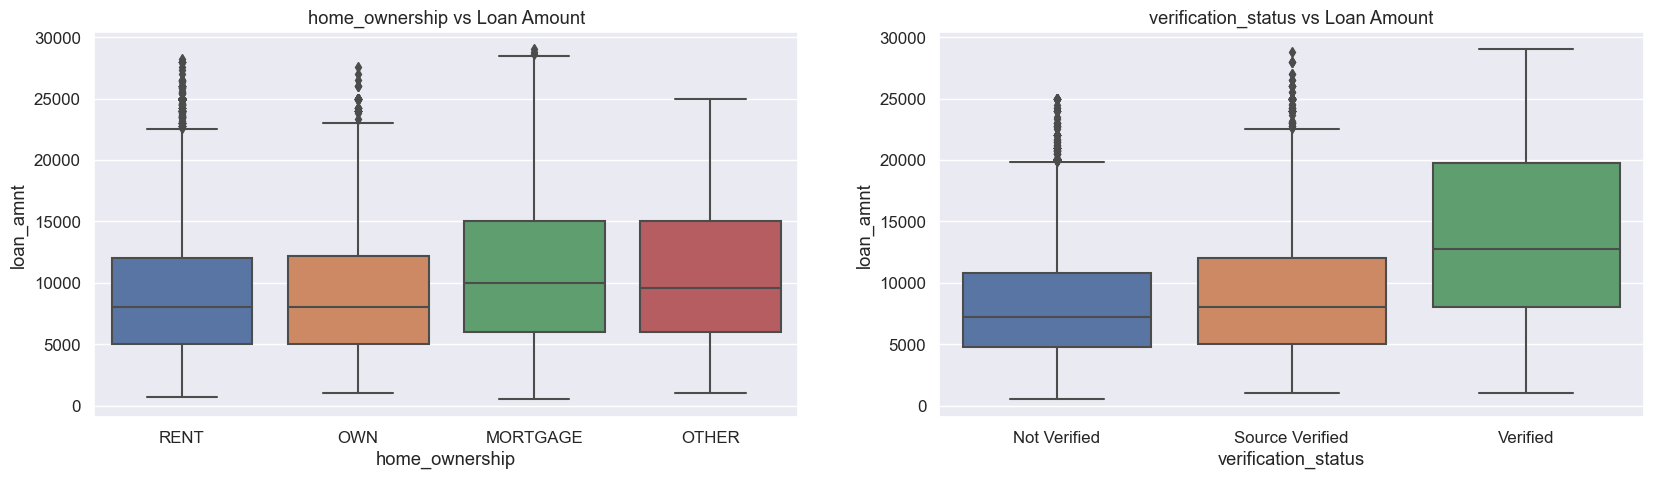

In [341]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(x='home_ownership', y=loan_df.loan_amnt, data=loan_df)
plt.title('home_ownership vs Loan Amount')

plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan_df.verification_status.unique()
verification_status_ord.sort()
sb.boxplot(x='verification_status', y=loan_df.loan_amnt, order = verification_status_ord, data=loan_df)

<b>Observations:</b><br/>
more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.<br/>
And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

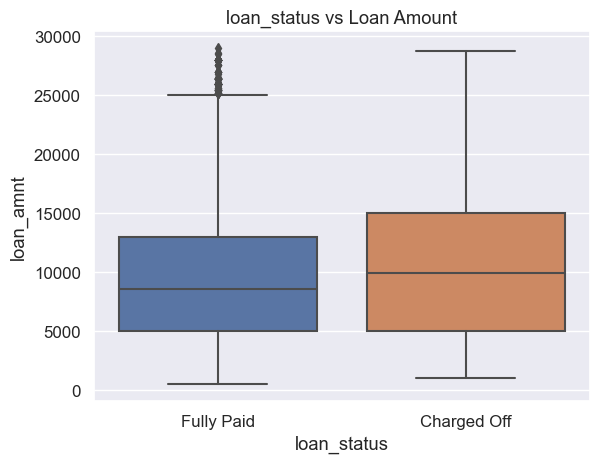

In [342]:
sb.boxplot(x='loan_status', y=loan_df.loan_amnt, data=loan_df)
plt.title('loan_status vs Loan Amount')

<b>Observations:</b></br>
Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Loan Amount')

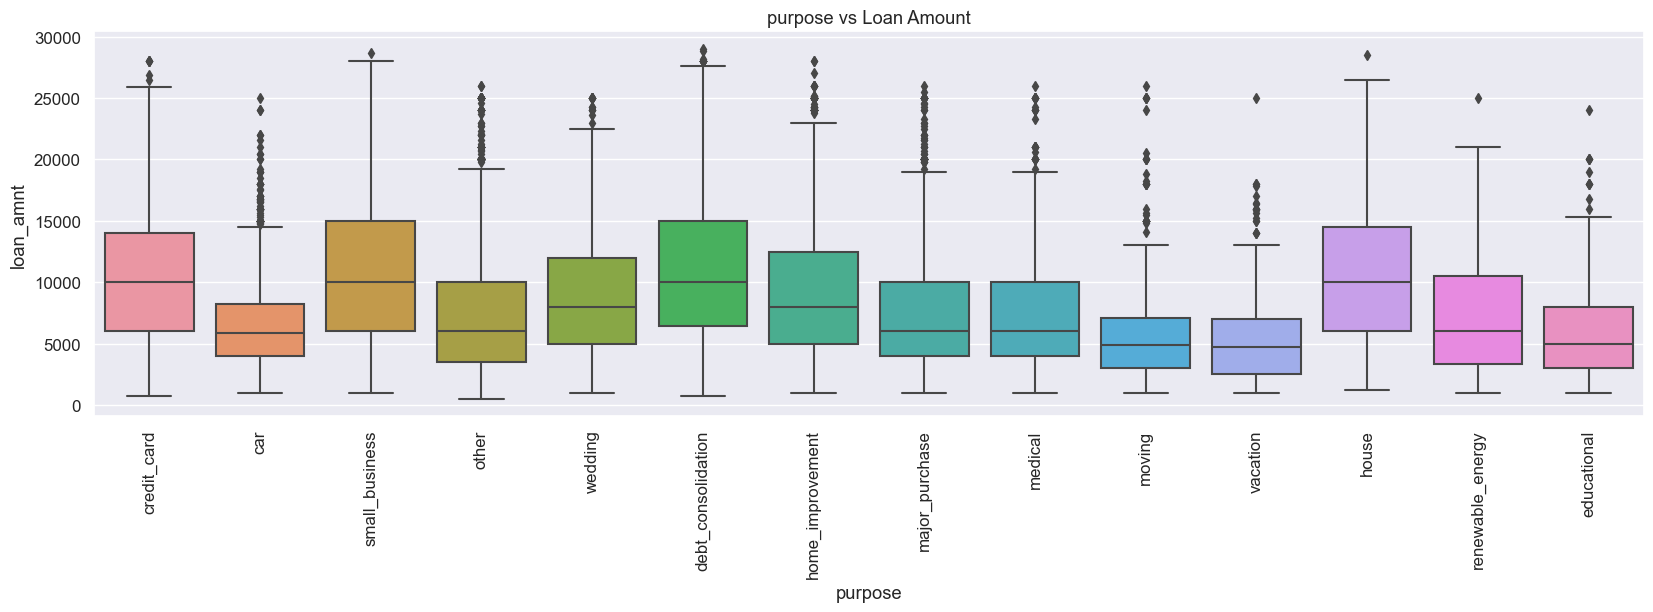

In [343]:
plt.figure(figsize=(20,5))
sb.boxplot(x='purpose', y=loan_df.loan_amnt, data=loan_df)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

<b>Observations:</b></br>
More loan amount is from Small bussiness followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

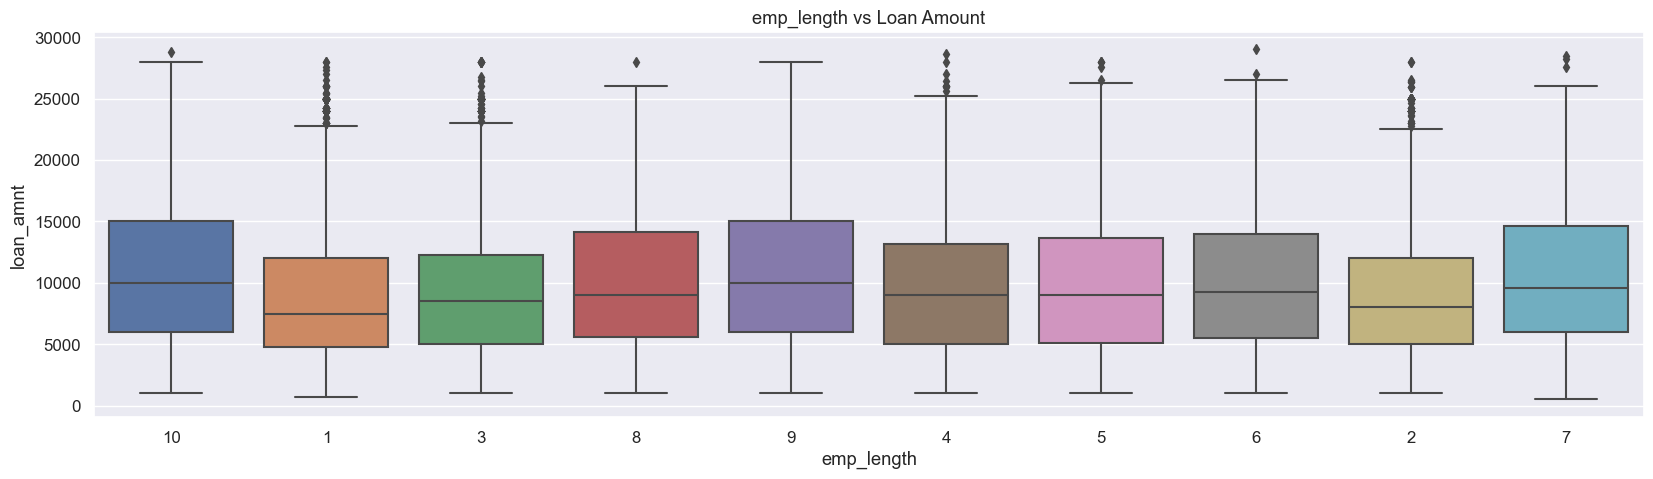

In [344]:
plt.figure(figsize=(20,5))
sb.boxplot(x='emp_length', y=loan_df.loan_amnt, data=loan_df)
plt.title('emp_length vs Loan Amount')

<b>Observations:</b></br>
more borrowers are from 10+ years and least is <1 year

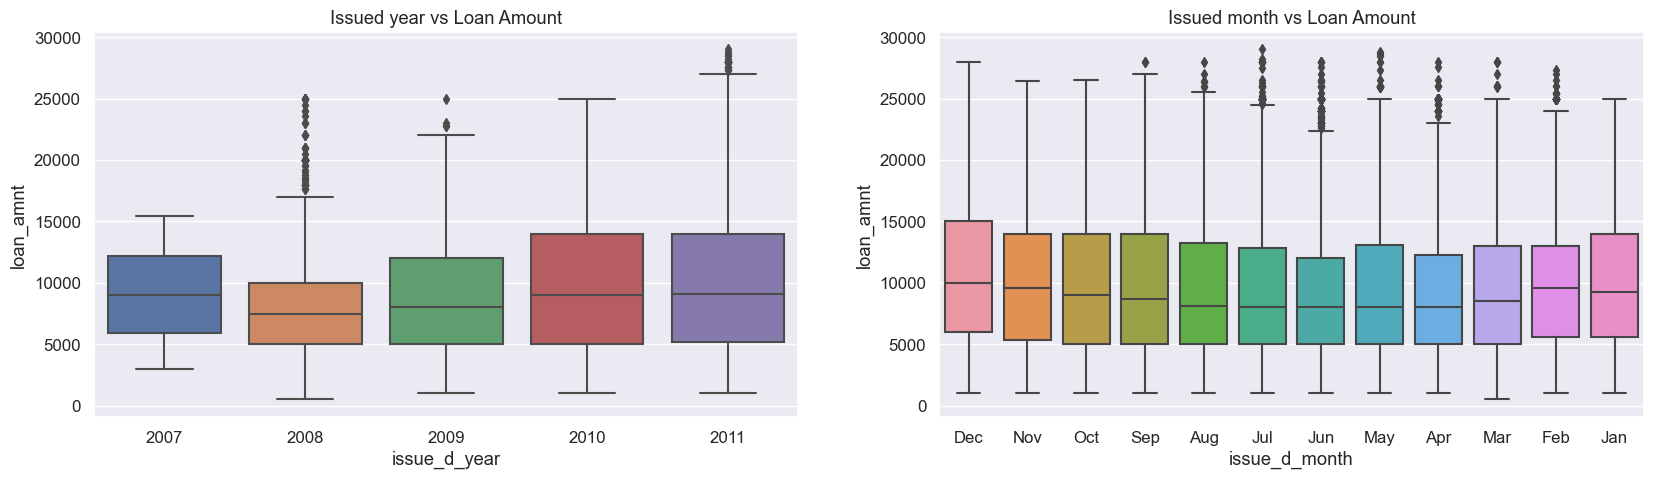

In [345]:
#Issue_d_year
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(x=loan_df.issue_d_year, y=loan_df.loan_amnt, data=loan_df)
plt.title('Issued year vs Loan Amount')

#Issue_d_month
plt.subplot(122)
sb.boxplot(x=loan_df.issue_d_month, y=loan_df.loan_amnt, data=loan_df)
plt.title('Issued month vs Loan Amount')
plt.show()

<b>Observations:</b></br>

The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.</br>
Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.</br>
Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.

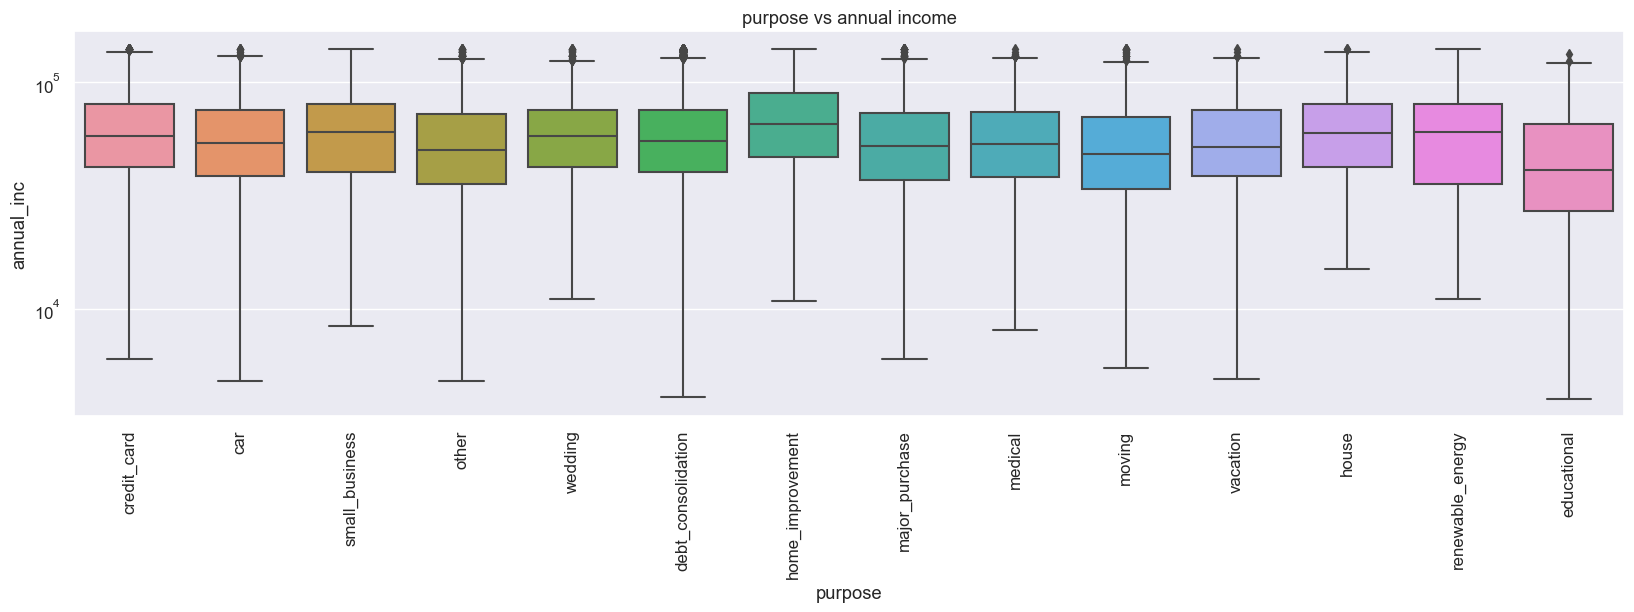

In [346]:
plt.figure(figsize=(20,5))
sb.boxplot(x='purpose', y=loan_df.annual_inc, data=loan_df)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

<b>Observations:</b></br>
A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

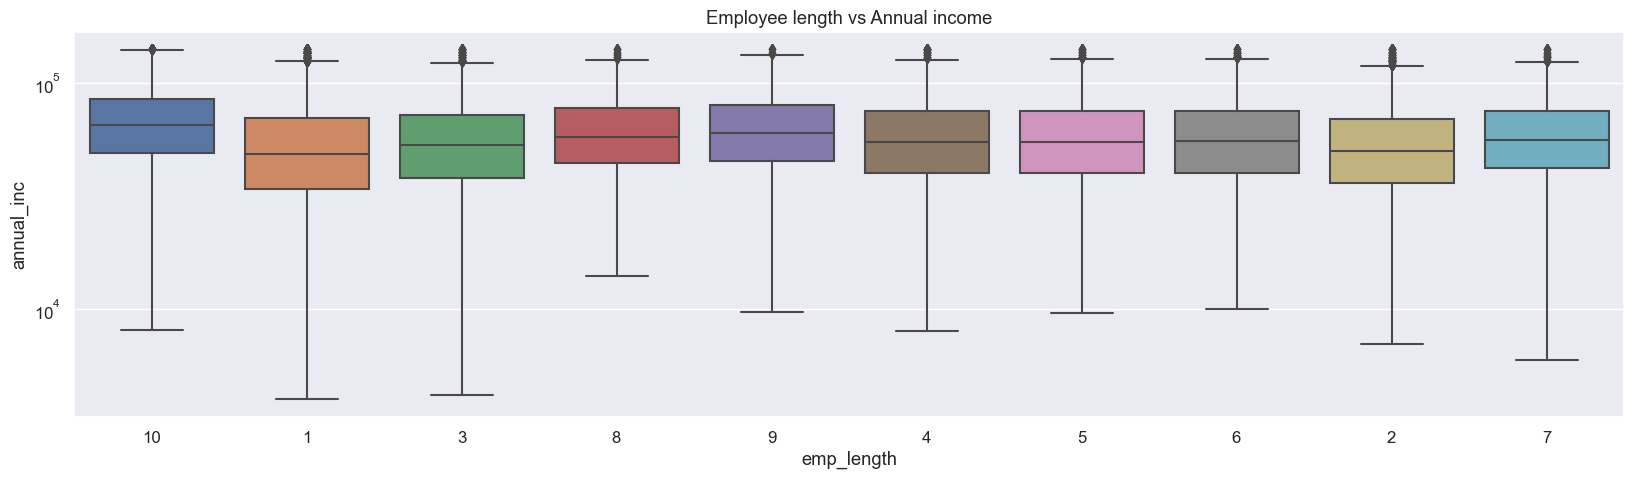

In [347]:
plt.figure(figsize=(20,5))
sb.boxplot(x='emp_length', y=loan_df.annual_inc, data=loan_df)
plt.title('Employee length vs Annual income')
plt.yscale('log')

<b>Observations:</b></br>
The borrower's who has higer income have taken loans for 10+ years of duration.

<Axes: title={'center': 'Grade vs dti'}, xlabel='grade', ylabel='dti'>

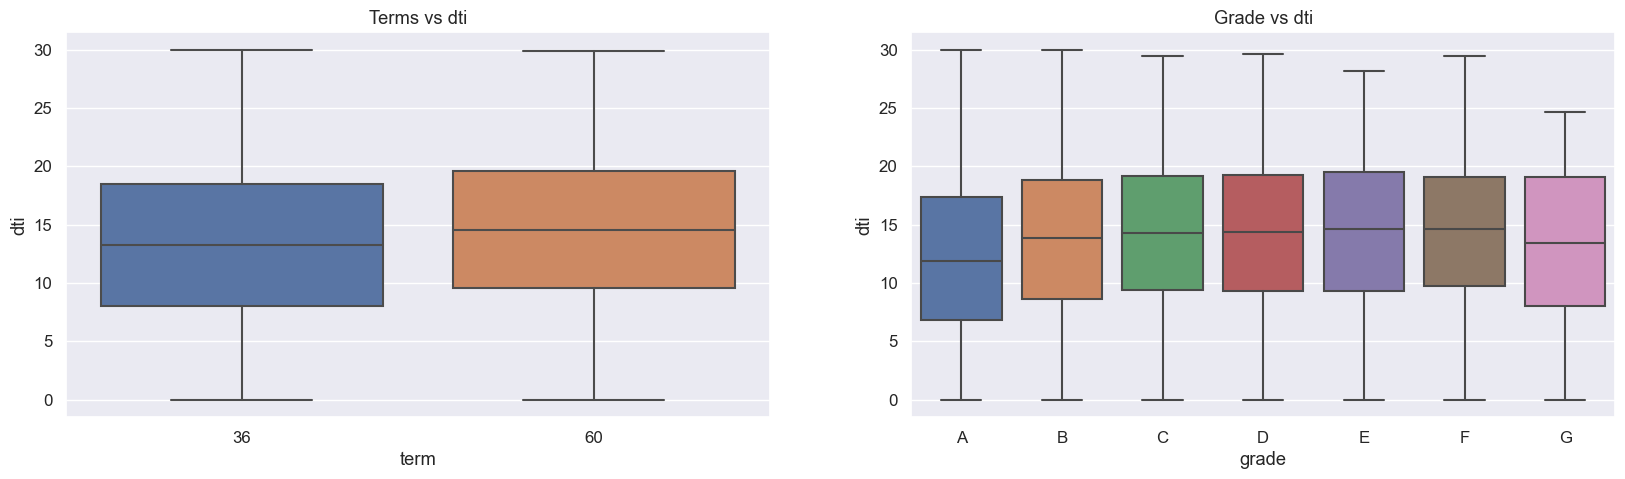

In [348]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(x='term', y=loan_df.dti, data=loan_df)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sb.boxplot(x='grade', y=loan_df.dti, order = grade_ord, data=loan_df)

<b>Observation:</b></br>
DTI is bit high for people who got more tenure i.e., 60 months.</br>
A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

Text(0.5, 1.0, 'loan_status vs dti')

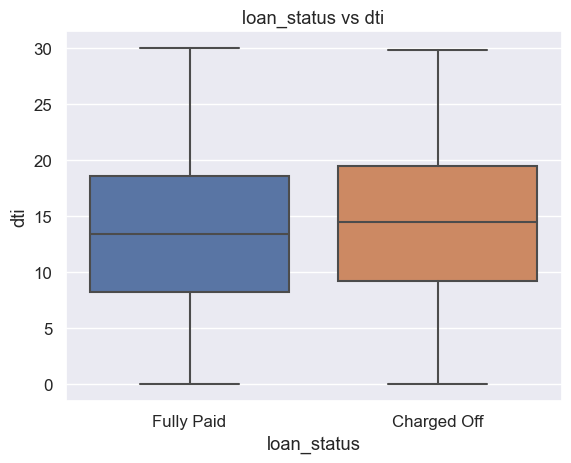

In [349]:
sb.boxplot(x='loan_status', y=loan_df.dti, data=loan_df)
plt.title('loan_status vs dti')

<b>Observations:</b></br>
Borrowers with high DTI has bit more probability to default

<h3><b>8. Correlation Analysis</b></h3>


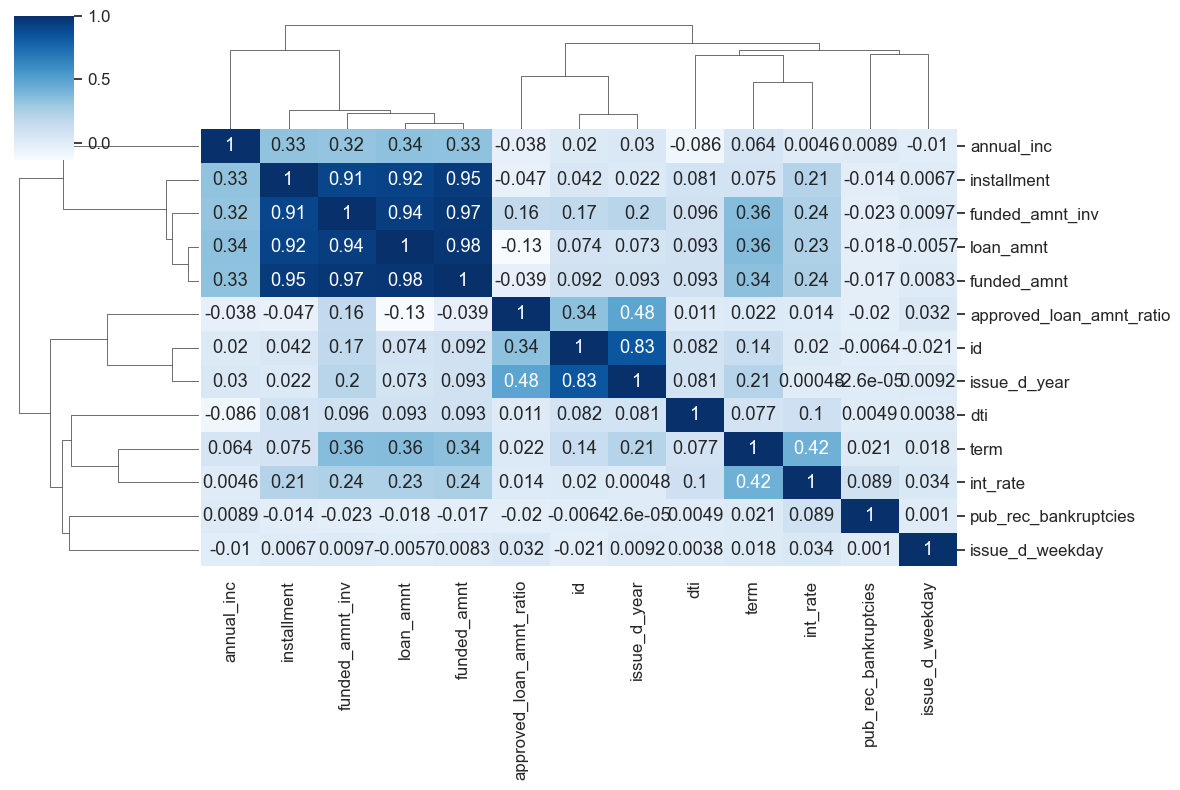

In [350]:
# Assuming you have a DataFrame named loan_df

# Make a copy of the DataFrame if you intend to modify it later
corr_loan = loan_df.copy()

# Exclude non-numeric columns from the correlation matrix calculation
numeric_cols = corr_loan.select_dtypes(include=['number']).columns
corr = corr_loan[numeric_cols].corr()

# Set the font scale for better readability
sb.set(font_scale=1.1)

# Create a cluster map with annotations, a specific figsize, and a colormap
sb.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")

# Show the plot
plt.show()


In [351]:
drop_columns = ['installment', 'id', 'issue_d_year', 'issue_d_month']
corr_loan = corr_loan.drop(columns=drop_columns)

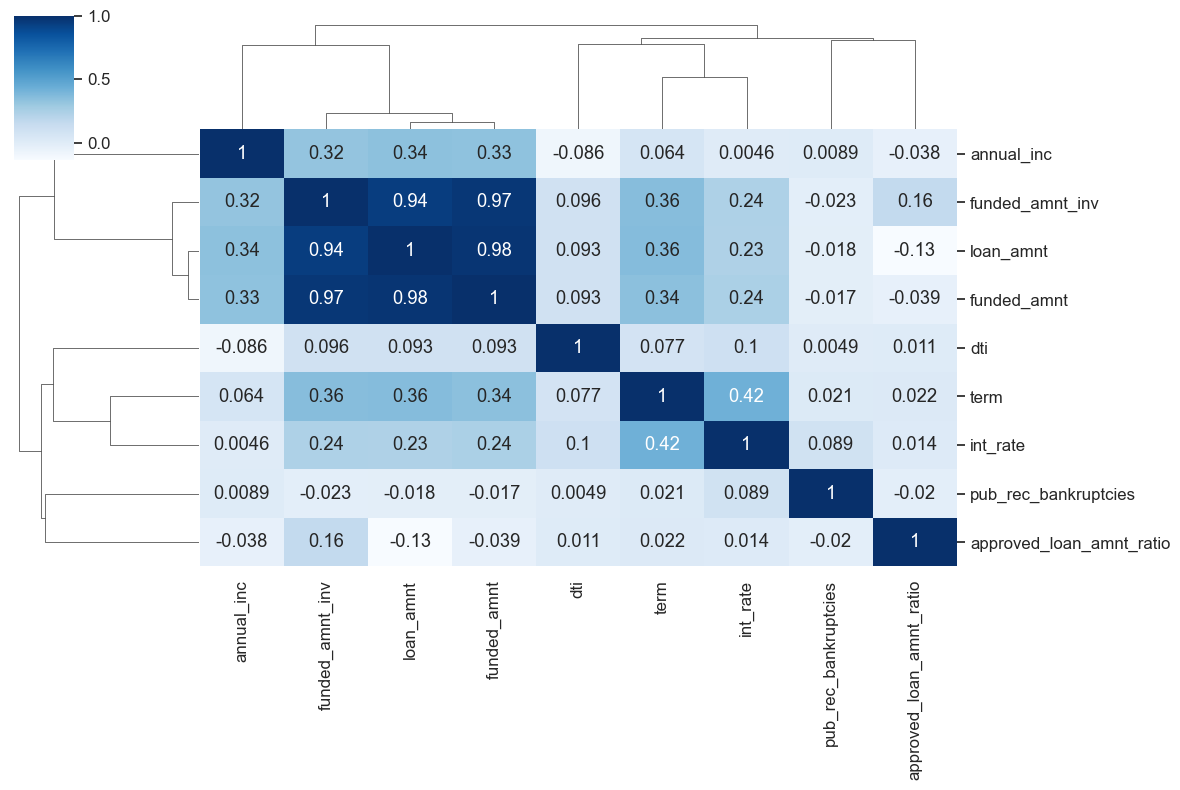

In [352]:
# Assuming corr_loan is your DataFrame
numeric_columns = corr_loan.select_dtypes(include=['float64', 'int64']).columns
corr = corr_loan[numeric_columns].corr()

sb.set(font_scale=1.1)
sb.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()


<h3><b>Observations:</b></h3></br>
Negative Correlation:

1.loan_amnt has negative correlation with pub_rec_bankrupticies

2.annual income has a negative correlation with dti

Strong Correlation:

1.term has a strong correlation with loan amount

2.term has a strong correlation with interest rate

3.annual income has a strong correlation with loan_amount

<Axes: xlabel='term', ylabel='loan_amnt'>

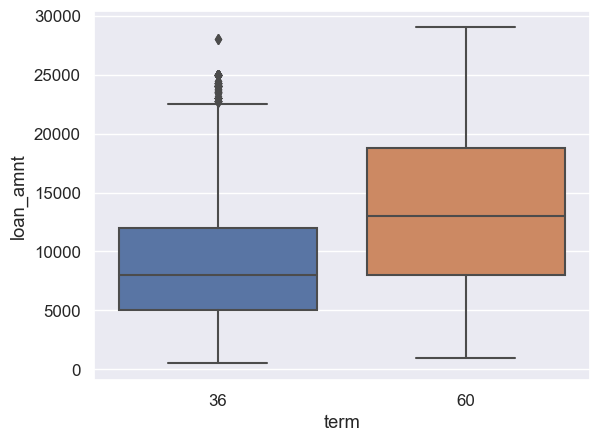

In [353]:
sb.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)


<h3><b>Observations:</b></h3></br>
from the above graph we can see that if term is increasing loan amount is also increasing



<Axes: xlabel='term', ylabel='int_rate'>

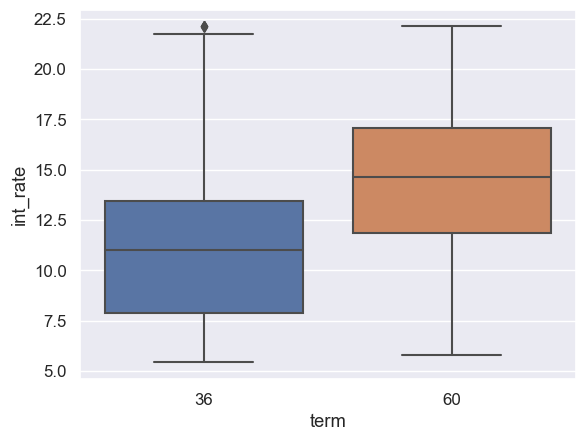

In [354]:
sb.boxplot(x = 'term', y = 'int_rate', data=corr_loan)